<a href="https://colab.research.google.com/github/EvandroMauricioSI/BDNoSQL_Gas_Prices_In_Brazil/blob/main/BD_NoSQL_(Gas_Prices_In_Brazil)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Baixar o arquivo csv com todos os dados**
- https://www.kaggle.com/datasets/matheusfreitag/gas-prices-in-brazil/data

In [ ]:
!pip install gdown
import gdown

# Google file ID
file_id = '1UTQ9ukWyau2LHXPvuYC_QxGekKTYXX71'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'gasolinaBr.csv'  #Faz uma cópia para armazenamento local

gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1UTQ9ukWyau2LHXPvuYC_QxGekKTYXX71
To: /content/gasolinaBr.csv
100%|██████████| 15.6M/15.6M [00:00<00:00, 54.3MB/s]


'gasolinaBr.csv'

**Importação do PANDAS e carga do arquivo gasolinaBr.csv em um
  DataFrame (df)**

In [ ]:
import pandas as pd

df = pd.read_csv("gasolinaBr.csv", delimiter="\t")
df.head()  # Mostra as primeiras 5 linhas

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082


* Corrigindo a Leitura do Arquivo com PySpark

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Colab Spark").getOrCreate()

# Ler o arquivo CSV com separador de tabulação
df = spark.read.option("delimiter", "\t") \
               .option("header", "true") \
               .option("inferSchema", "true") \
               .csv("gasolinaBr.csv")

df.show(10, truncate=False)

df.printSchema()

print(f"O DataFrame possui {df.count()} linhas.")

+------------+----------+------------+------------------+----------------+----------------------------+-----------------+-------------------+---------------------+--------------------+--------------------+--------------------+------------------------+------------------------+--------------------------+-------------------------+-------------------------+-----------------------------+
|DATA INICIAL|DATA FINAL|REGIÃO      |ESTADO            |PRODUTO         |NÚMERO DE POSTOS PESQUISADOS|UNIDADE DE MEDIDA|PREÇO MÉDIO REVENDA|DESVIO PADRÃO REVENDA|PREÇO MÍNIMO REVENDA|PREÇO MÁXIMO REVENDA|MARGEM MÉDIA REVENDA|COEF DE VARIAÇÃO REVENDA|PREÇO MÉDIO DISTRIBUIÇÃO|DESVIO PADRÃO DISTRIBUIÇÃO|PREÇO MÍNIMO DISTRIBUIÇÃO|PREÇO MÁXIMO DISTRIBUIÇÃO|COEF DE VARIAÇÃO DISTRIBUIÇÃO|
+------------+----------+------------+------------------+----------------+----------------------------+-----------------+-------------------+---------------------+--------------------+--------------------+--------------------+--

---
# **DIAGRAMA MODELO MULTIDIMENSIONAL**

---


Imagem
https://app.diagrams.net/#G1UqyVZ3tSobr5DVC4DhjrRbunJVlutphl#%7B%22pageId%22%3A%2296DfGDt4tTPL2OlebHZd%22%7D



Diagrama Fact Constellation para modelo multidimensional:


Elementos da Notação Pé de Galinha

A notação utiliza símbolos específicos nas extremidades das linhas que conectam as entidades para denotar a cardinalidade:

    Um (barra simples): Representa exatamente uma instância.
    Muitos (pé de galinha): Representa muitas instâncias (zero, uma ou mais, dependendo da cardinalidade mínima).
    Zero (círculo): Representa zero instâncias (opcionalidade).

Aplicação no esquema Fact Constellation:

Em um esquema multidimensional do tipo constelação de fatos (fact constellation), o "pé de galinha" (que representa o lado "muitos" de um relacionamento) fica do lado das tabelas fato em relação às tabelas dimensão por um motivo fundamental:

Uma única ocorrência em uma tabela dimensão (como uma localização específica, um produto específico ou uma data específica) pode estar associada a muitos registros em uma ou mais tabelas fato.

Diagrama Fact Constellation para modelo multidimensional:



---



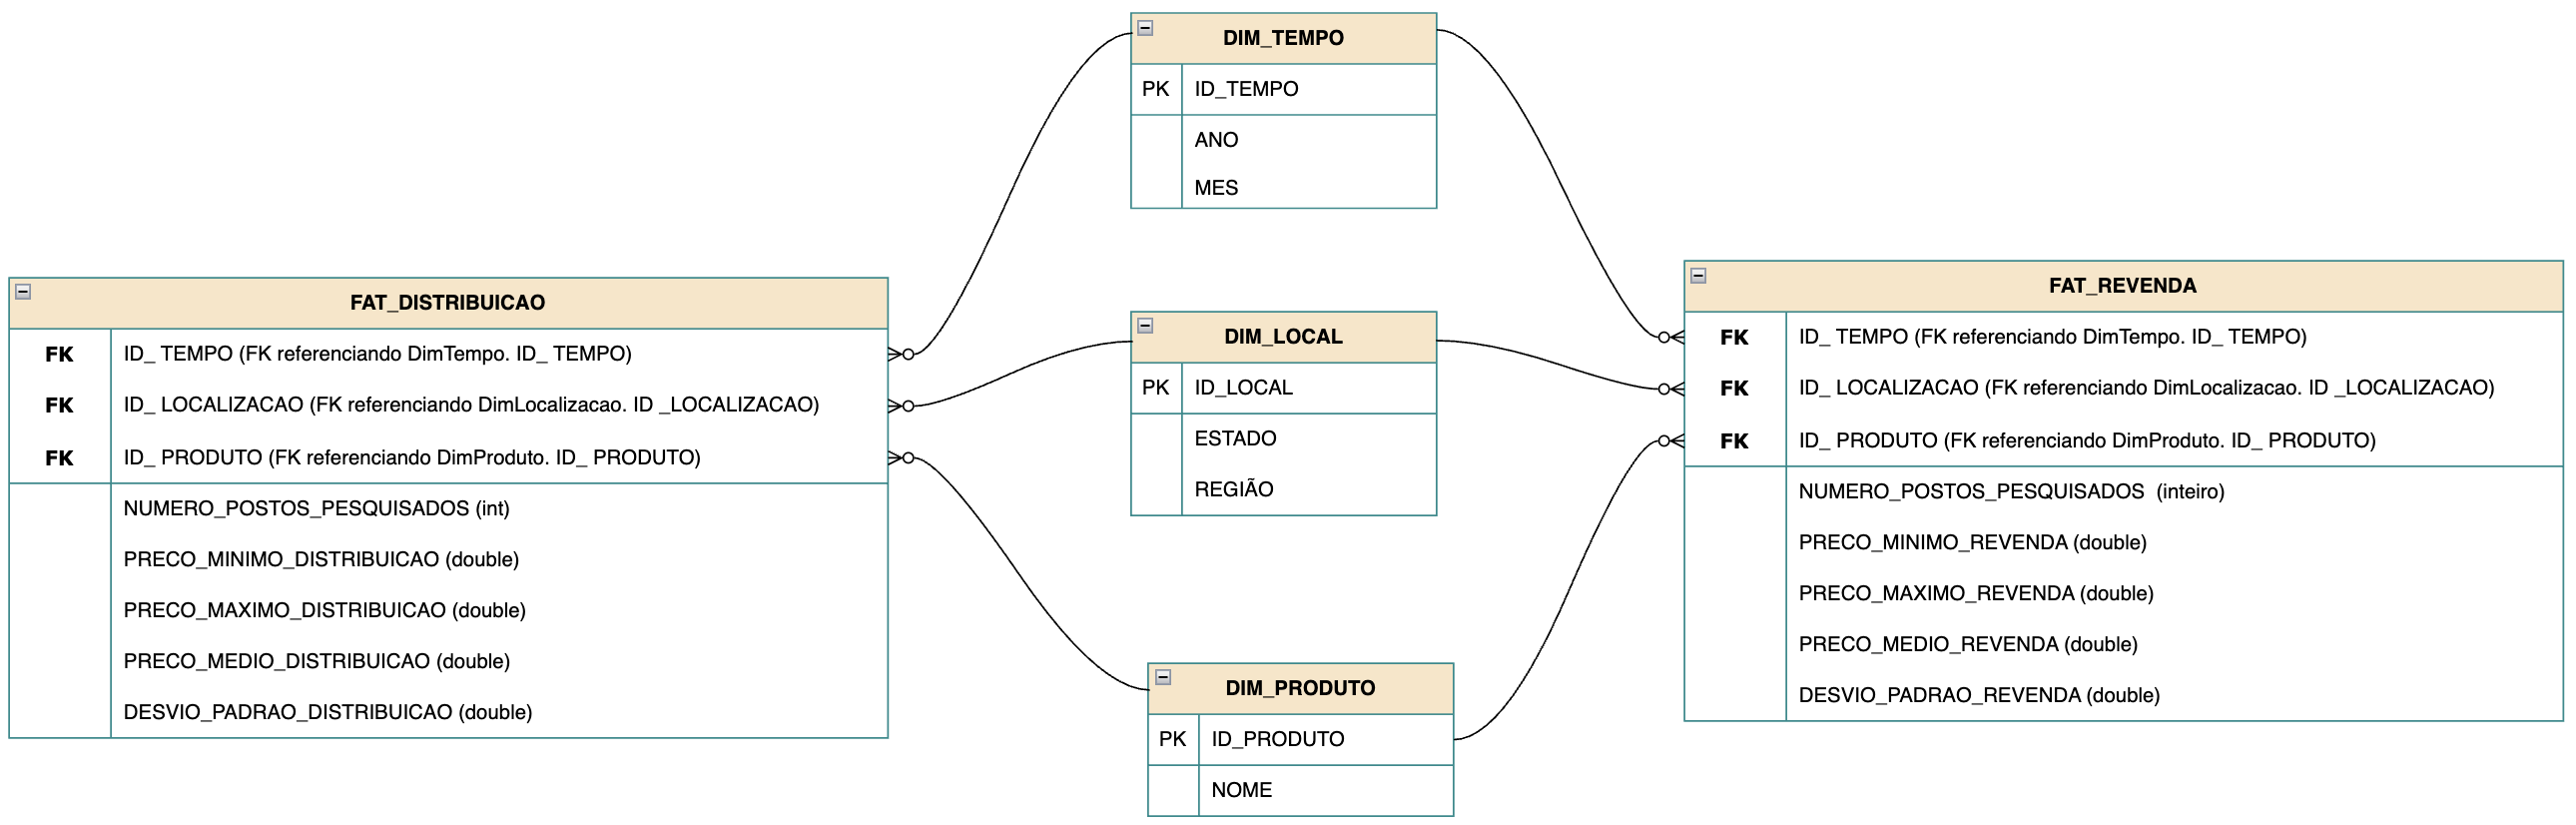

---
# **LIMPEZA DOS DADOS**
---

# **Mudanças que devem ser feitas**
* **REGIÃO [string]** ⚠️ converter ASCII
* **ESTADO [string]** ⚠️ converter ASCII
* **PRODUTO [string]** ⚠️ converter ASCII
* **UNIDADE DE MEDIDA [string]** ⚠️ converter ASCII
---
* **MARGEM MÉDIA REVENDA [string]** ⚠️ converter para double
* **PREÇO MÉDIO DISTRIBUIÇÃO [string]** ⚠️ converter para double
* **DESVIO PADRÃO DISTRIBUIÇÃO [string]** ⚠️ converter para double
* **PREÇO MÍNIMO DISTRIBUIÇÃO [string]** ⚠️ converter para double
* **PREÇO MÁXIMO DISTRIBUIÇÃO [string]** ⚠️ converter para double
* **COEF DE VARIAÇÃO DISTRIBUIÇÃO [string]** ⚠️ converter para double
---
Algumas colunas **numéricas** estão sendo lidas como **string**, isso pode ter ocorrido por:
* Presença de valores inválidos (ex: "*", "NR", "NA" ou campos vazios)
* Separadores decimais incorretos (ex: vírgula em vez de ponto).
* Problemas no parser (tipo ao ler CSV sem indicar inferSchema=True ou com header=False).

---
# **Converte strings para ASCII**
* REGIÃO [string] ⚠️ converter ASCII
* ESTADO [string] ⚠️ converter ASCII
* PRODUTO [string] ⚠️ converter ASCII
* UNIDADE DE MEDIDA [string] ⚠️ converter ASCII


In [ ]:
!pip install unidecode # Instalar o unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 5.4 MB/s eta 0:00:00


In [ ]:
from pyspark.sql.functions import udf, col
from pyspark.sql.types import StringType
from unidecode import unidecode

# Função para remover acentuação e colocar em maiúsculo
def to_ascii_upper(text):
    if text is not None:
        return unidecode(text).upper()
    return None

# Criar UDF
to_ascii_upper_udf = udf(to_ascii_upper, StringType())

# Identificar colunas do tipo string
string_cols = [field.name for field in df.schema.fields if isinstance(field.dataType, StringType)]

# Aplicar transformação
for col_name in string_cols:
    df = df.withColumn(col_name, to_ascii_upper_udf(col(col_name)))

# Mostrar resultados
df.show()

# Exemplo de verificação
df.select("PRODUTO").distinct().orderBy("PRODUTO").show(truncate=False)

df.printSchema()


+------------+----------+------------+-------------------+----------------+----------------------------+-----------------+-------------------+---------------------+--------------------+--------------------+--------------------+------------------------+------------------------+--------------------------+-------------------------+-------------------------+-----------------------------+
|DATA INICIAL|DATA FINAL|      REGIÃO|             ESTADO|         PRODUTO|NÚMERO DE POSTOS PESQUISADOS|UNIDADE DE MEDIDA|PREÇO MÉDIO REVENDA|DESVIO PADRÃO REVENDA|PREÇO MÍNIMO REVENDA|PREÇO MÁXIMO REVENDA|MARGEM MÉDIA REVENDA|COEF DE VARIAÇÃO REVENDA|PREÇO MÉDIO DISTRIBUIÇÃO|DESVIO PADRÃO DISTRIBUIÇÃO|PREÇO MÍNIMO DISTRIBUIÇÃO|PREÇO MÁXIMO DISTRIBUIÇÃO|COEF DE VARIAÇÃO DISTRIBUIÇÃO|
+------------+----------+------------+-------------------+----------------+----------------------------+-----------------+-------------------+---------------------+--------------------+--------------------+--------------------

---
# **Converter STRING para DOUBLE**
* MARGEM MÉDIA REVENDA [string] ⚠️ converter para double
* PREÇO MÉDIO DISTRIBUIÇÃO [string] ⚠️ converter para double
* DESVIO PADRÃO DISTRIBUIÇÃO [string] ⚠️ converter para double
* PREÇO MÍNIMO DISTRIBUIÇÃO [string] ⚠️ converter para double
* PREÇO MÁXIMO DISTRIBUIÇÃO [string] ⚠️ converter para double
* COEF DE VARIAÇÃO DISTRIBUIÇÃO [string] ⚠️ converter para double

In [ ]:
from pyspark.sql.functions import col, regexp_replace, when, count

# Lista das colunas que devem ser convertidas
colunas_para_converter = [
    "MARGEM MÉDIA REVENDA",
    "PREÇO MÉDIO DISTRIBUIÇÃO",
    "DESVIO PADRÃO DISTRIBUIÇÃO",
    "PREÇO MÍNIMO DISTRIBUIÇÃO",
    "PREÇO MÁXIMO DISTRIBUIÇÃO",
    "COEF DE VARIAÇÃO DISTRIBUIÇÃO",
]

# Verificar valores negativos legítimos (< 0 e diferentes de -99999.0)
print("Valores negativos legítimos por coluna:")
df.select([
    count(when((col(c) < 0) & (col(c).isNotNull()), True)).alias(c)
    for c in colunas_para_converter
]).show(truncate=False)

# Substituir vírgula por ponto e converter para double
for coluna in colunas_para_converter:
    df = df.withColumn(coluna, regexp_replace(col(coluna), ",", ".").cast("double"))

# Substituir -99999.0 por null (sem afetar outros negativos)
#for coluna in colunas_para_converter:
#    df = df.withColumn(coluna, when(col(coluna) == -99999.0, None).otherwise(col(coluna)))

# Verificar valores nulos em cada coluna
print("Colunas com valores nulos:")
df.select([
    count(when(col(c).isNull(), True)).alias(c)
    for c in colunas_para_converter
]).show(truncate=False)

df.describe().show()

# Atualização da estrutura (schema)
df.printSchema()

Valores negativos legítimos por coluna:
+--------------------+------------------------+--------------------------+-------------------------+-------------------------+-----------------------------+
|MARGEM MÉDIA REVENDA|PREÇO MÉDIO DISTRIBUIÇÃO|DESVIO PADRÃO DISTRIBUIÇÃO|PREÇO MÍNIMO DISTRIBUIÇÃO|PREÇO MÁXIMO DISTRIBUIÇÃO|COEF DE VARIAÇÃO DISTRIBUIÇÃO|
+--------------------+------------------------+--------------------------+-------------------------+-------------------------+-----------------------------+
|5517                |5508                    |5508                      |5508                     |5508                     |5508                         |
+--------------------+------------------------+--------------------------+-------------------------+-------------------------+-----------------------------+

Colunas com valores nulos:
+--------------------+------------------------+--------------------------+-------------------------+-------------------------+---------------------

# **Formatação dos números**

In [ ]:
from pyspark.sql.functions import round, col
from pyspark.sql.types import DoubleType

# Identifica todas as colunas do tipo DoubleType
double_cols = [field.name for field in df.schema.fields if isinstance(field.dataType, DoubleType)]

# Arredonda essas colunas para 4 casas decimais
for col_name in double_cols:
    df = df.withColumn(col_name, round(col(col_name), 4))

df.show(20, truncate=False)
print(f"O DataFrame possui {df.count()} linhas.")

df.printSchema()

+------------+----------+------------+-------------------+----------------+----------------------------+-----------------+-------------------+---------------------+--------------------+--------------------+--------------------+------------------------+------------------------+--------------------------+-------------------------+-------------------------+-----------------------------+
|DATA INICIAL|DATA FINAL|REGIÃO      |ESTADO             |PRODUTO         |NÚMERO DE POSTOS PESQUISADOS|UNIDADE DE MEDIDA|PREÇO MÉDIO REVENDA|DESVIO PADRÃO REVENDA|PREÇO MÍNIMO REVENDA|PREÇO MÁXIMO REVENDA|MARGEM MÉDIA REVENDA|COEF DE VARIAÇÃO REVENDA|PREÇO MÉDIO DISTRIBUIÇÃO|DESVIO PADRÃO DISTRIBUIÇÃO|PREÇO MÍNIMO DISTRIBUIÇÃO|PREÇO MÁXIMO DISTRIBUIÇÃO|COEF DE VARIAÇÃO DISTRIBUIÇÃO|
+------------+----------+------------+-------------------+----------------+----------------------------+-----------------+-------------------+---------------------+--------------------+--------------------+--------------------

In [ ]:
df.select("UNIDADE DE MEDIDA") \
  .distinct() \
  .show(truncate=False)

+-----------------+
|UNIDADE DE MEDIDA|
+-----------------+
|R$/L             |
|R$/M3            |
|R$/13KG          |
+-----------------+



# **Padronização das Unidades de Medidas**

VERIFICANDO PREÇOS **ANTES A PADRONIZAÇÃO**
* Essa exibição é somente para verificar se a conversão foi feita corretamente



In [ ]:
# Não deve sofrer alterações nos valores após a padronização
df.filter(col("PRODUTO").like("%ETANOL%")).show(5, truncate=False)

# Deve sofrer alterações nos valores apórs a padronização
df.filter(col("PRODUTO").like("%GNV%")).show(5, truncate=False)

# Deve sofrer alterações nos valores apórs a padronização
df.filter(col("PRODUTO").like("%GLP%")).show(5, truncate=False)

+------------+----------+------------+------------------+----------------+----------------------------+-----------------+-------------------+---------------------+--------------------+--------------------+--------------------+------------------------+------------------------+--------------------------+-------------------------+-------------------------+-----------------------------+
|DATA INICIAL|DATA FINAL|REGIÃO      |ESTADO            |PRODUTO         |NÚMERO DE POSTOS PESQUISADOS|UNIDADE DE MEDIDA|PREÇO MÉDIO REVENDA|DESVIO PADRÃO REVENDA|PREÇO MÍNIMO REVENDA|PREÇO MÁXIMO REVENDA|MARGEM MÉDIA REVENDA|COEF DE VARIAÇÃO REVENDA|PREÇO MÉDIO DISTRIBUIÇÃO|DESVIO PADRÃO DISTRIBUIÇÃO|PREÇO MÍNIMO DISTRIBUIÇÃO|PREÇO MÁXIMO DISTRIBUIÇÃO|COEF DE VARIAÇÃO DISTRIBUIÇÃO|
+------------+----------+------------+------------------+----------------+----------------------------+-----------------+-------------------+---------------------+--------------------+--------------------+--------------------+--

**CRIANDO UM DF PARA UNIDADES DE MEDIDAS**

Assim será possível adicionar, quando necessário, outras medidas.

Como por exemplo o 1 galão americano (gal) = 3,78541 litros ou Barril (bbl) que é aproximadamente 159 litros.


In [ ]:
from pyspark.sql.functions import monotonically_increasing_id, row_number
from pyspark.sql.window import Window
from pyspark.sql.types import StructType, StructField, StringType, DoubleType


# Seus dados de origem
dados_conversao = [
    ("R$/M3", 400.0),     # 1 m³ = 400 litros
    ("R$/13KG", 24.07)    # 13 kg GLP ≈ 24.07 litros
]

schema = StructType([
    StructField("UNIDADE_ORIGEM", StringType(), True),
    StructField("FATOR_CONVERSAO", DoubleType(), True)
])

# Criação do DataFrame
df_unidades_de_medidas = spark.createDataFrame(dados_conversao, schema)

# Janela para gerar ID sequencial
window_spec = Window.orderBy("UNIDADE_ORIGEM")

# Adiciona chave primária sequencial
df_unidades_de_medidas = df_unidades_de_medidas.withColumn(
    "ID_UNIDADE", row_number().over(window_spec)
)

# Reorganiza as colunas para deixar o ID na frente
df_unidades_de_medidas = df_unidades_de_medidas.select("ID_UNIDADE", "UNIDADE_ORIGEM", "FATOR_CONVERSAO")

df_unidades_de_medidas.show()

+----------+--------------+---------------+
|ID_UNIDADE|UNIDADE_ORIGEM|FATOR_CONVERSAO|
+----------+--------------+---------------+
|         1|       R$/13KG|          24.07|
|         2|         R$/M3|          400.0|
+----------+--------------+---------------+



In [ ]:
from re import M
from pyspark.sql.functions import col, when, round

# COLUNAS QUE PRECISAM SER CONVERTIDAS DE ACORDO COM A UNIDADE
colunas_para_converter = [
    "PREÇO MÉDIO REVENDA",
    "PREÇO MÍNIMO REVENDA",
    "PREÇO MÁXIMO REVENDA",
    "MARGEM MÉDIA REVENDA",
    "PREÇO MÉDIO DISTRIBUIÇÃO",
    "PREÇO MÍNIMO DISTRIBUIÇÃO",
    "PREÇO MÁXIMO DISTRIBUIÇÃO"
]
# 1 metro cúbico de GNV a 220 bar equivale a aproximadamente 400 litros de gás natural no estado padrão (1 atm e 20°C).
# A pressão de 220 bar é a pressão usual de enchimento dos cilindros de GNV em postos de abastecimento.
M3_LITROS = 400

# O volume de 13kg de GLP é aproximadamente 24.07 litros.
GLP_LITROS = 24.07

casas_decimais = 4

for coluna in colunas_para_converter:
    df = df.withColumn(
        coluna,
        when(col("UNIDADE DE MEDIDA") == "R$/M3", round(col(coluna) / M3_LITROS, casas_decimais))
        .when(col("UNIDADE DE MEDIDA") == "R$/13KG", round(col(coluna) / GLP_LITROS, casas_decimais))
        .otherwise(round(col(coluna), casas_decimais))
    )
# Padronizar unidade de medida para R$/l
df = df.withColumn(
    "UNIDADE DE MEDIDA",
    when(col("UNIDADE DE MEDIDA").isin("R$/M3", "R$/13KG"), "R$/L")
    .otherwise(col("UNIDADE DE MEDIDA"))
)

df.select("UNIDADE DE MEDIDA").distinct().show(truncate=False)

+-----------------+
|UNIDADE DE MEDIDA|
+-----------------+
|R$/L             |
+-----------------+



VERIFICANDO PREÇOS **APÓS A CONVERSÃO**

In [ ]:
#Verificando se não houve alteração em colunas que já estavam em R$/l
df.filter(col("PRODUTO").like("%ETANOL%")).show(5, truncate=False)

#Verificando alteração em colunas que houve a conversão de R$/m3 para  R$/l
df.filter(col("PRODUTO").like("%GNV%")).show(5, truncate=False)

#Verificando alteração em colunas que houve a conversão de R$/13Kg para  R$/l
df.filter(col("PRODUTO").like("%GLP%")).show(5, truncate=False)

+------------+----------+------------+------------------+----------------+----------------------------+-----------------+-------------------+---------------------+--------------------+--------------------+--------------------+------------------------+------------------------+--------------------------+-------------------------+-------------------------+-----------------------------+
|DATA INICIAL|DATA FINAL|REGIÃO      |ESTADO            |PRODUTO         |NÚMERO DE POSTOS PESQUISADOS|UNIDADE DE MEDIDA|PREÇO MÉDIO REVENDA|DESVIO PADRÃO REVENDA|PREÇO MÍNIMO REVENDA|PREÇO MÁXIMO REVENDA|MARGEM MÉDIA REVENDA|COEF DE VARIAÇÃO REVENDA|PREÇO MÉDIO DISTRIBUIÇÃO|DESVIO PADRÃO DISTRIBUIÇÃO|PREÇO MÍNIMO DISTRIBUIÇÃO|PREÇO MÁXIMO DISTRIBUIÇÃO|COEF DE VARIAÇÃO DISTRIBUIÇÃO|
+------------+----------+------------+------------------+----------------+----------------------------+-----------------+-------------------+---------------------+--------------------+--------------------+--------------------+--

In [ ]:
#Verificando como o df ficou após o tratamento
num_linhas = df.count()
num_colunas = len(df.columns)

print(f"O DataFrame tem {num_linhas} linhas e {num_colunas} colunas.")

df.printSchema()

O DataFrame tem 120823 linhas e 18 colunas.
root
 |-- DATA INICIAL: date (nullable = true)
 |-- DATA FINAL: date (nullable = true)
 |-- REGIÃO: string (nullable = true)
 |-- ESTADO: string (nullable = true)
 |-- PRODUTO: string (nullable = true)
 |-- NÚMERO DE POSTOS PESQUISADOS: integer (nullable = true)
 |-- UNIDADE DE MEDIDA: string (nullable = true)
 |-- PREÇO MÉDIO REVENDA: double (nullable = true)
 |-- DESVIO PADRÃO REVENDA: double (nullable = true)
 |-- PREÇO MÍNIMO REVENDA: double (nullable = true)
 |-- PREÇO MÁXIMO REVENDA: double (nullable = true)
 |-- MARGEM MÉDIA REVENDA: double (nullable = true)
 |-- COEF DE VARIAÇÃO REVENDA: double (nullable = true)
 |-- PREÇO MÉDIO DISTRIBUIÇÃO: double (nullable = true)
 |-- DESVIO PADRÃO DISTRIBUIÇÃO: double (nullable = true)
 |-- PREÇO MÍNIMO DISTRIBUIÇÃO: double (nullable = true)
 |-- PREÇO MÁXIMO DISTRIBUIÇÃO: double (nullable = true)
 |-- COEF DE VARIAÇÃO DISTRIBUIÇÃO: double (nullable = true)



---
# **TRATAMENTO DE OUTLIERS**
---



O intervalo interquartil (IQR) é uma medida estatística que representa a dispersão de um conjunto de dados, focando na parte central da distribuição. Ele é muito usado na detecção de outliers porque ajuda a identificar valores que estão muito distantes da maioria.

\
**Como é calculado o IQR?**

O IQR é a diferença entre o terceiro quartil (Q3) e o primeiro quartil (Q1):

`IQR = Q3 - Q1`

* `Q1` (1º quartil): é o valor que separa os 25% menores dados.
* `Q3` (3º quartil): é o valor que separa os 75% menores dados (ou seja, 25% dos maiores).
* O IQR, portanto, representa os 50% centrais dos dados (do 25º ao 75º percentil).

\
**Por que o IQR é usado para detectar outliers?**

Valores considerados outliers geralmente estão muito abaixo de Q1 ou muito acima de Q3. Uma regra prática comum:

* Um valor é outlier inferior se for menor que: `Q1 - 1.5 x IQR` (usaremos 2.25)
* Um valor é outlier superior se for maior que: `Q3 + 1.5 x IQR` (usaremos 2.25)

Esses limites são chamados de limites de detecção de outliers.


contando valores nulos antes do tratamento:

In [ ]:
from pyspark.sql.functions import col, sum, when
from pyspark.sql import functions as F

# Contar valores nulos por coluna
df.select([
    F.sum(when(col(c).isNull(), 1).otherwise(0)).alias(c)
    for c in df.columns
]).show()

+------------+----------+------+------+-------+----------------------------+-----------------+-------------------+---------------------+--------------------+--------------------+--------------------+------------------------+------------------------+--------------------------+-------------------------+-------------------------+-----------------------------+
|DATA INICIAL|DATA FINAL|REGIÃO|ESTADO|PRODUTO|NÚMERO DE POSTOS PESQUISADOS|UNIDADE DE MEDIDA|PREÇO MÉDIO REVENDA|DESVIO PADRÃO REVENDA|PREÇO MÍNIMO REVENDA|PREÇO MÁXIMO REVENDA|MARGEM MÉDIA REVENDA|COEF DE VARIAÇÃO REVENDA|PREÇO MÉDIO DISTRIBUIÇÃO|DESVIO PADRÃO DISTRIBUIÇÃO|PREÇO MÍNIMO DISTRIBUIÇÃO|PREÇO MÁXIMO DISTRIBUIÇÃO|COEF DE VARIAÇÃO DISTRIBUIÇÃO|
+------------+----------+------+------+-------+----------------------------+-----------------+-------------------+---------------------+--------------------+--------------------+--------------------+------------------------+------------------------+--------------------------+------

In [ ]:
from pyspark.sql import functions as F
from pyspark.sql.window import Window

# Lista de colunas que serão analisadas
colunas_numericas = [
    "PREÇO MÉDIO REVENDA",
    "DESVIO PADRÃO REVENDA",
    "PREÇO MÍNIMO REVENDA",
    "PREÇO MÁXIMO REVENDA",
    "PREÇO MÉDIO DISTRIBUIÇÃO",
    "DESVIO PADRÃO DISTRIBUIÇÃO",
    "PREÇO MÍNIMO DISTRIBUIÇÃO",
    "PREÇO MÁXIMO DISTRIBUIÇÃO"
]

# Função para substituir outliers por null com agrupamento por produto
def substituir_outliers_por_produto(df, coluna):
    # Define a janela particionada por produto
    window_spec = Window.partitionBy("PRODUTO")

    # Calcula os quartis diretamente usando funções de janela
    df = df.withColumn('q1', F.expr(f'percentile_approx(`{coluna}`, 0.25)').over(window_spec))
    df = df.withColumn('q3', F.expr(f'percentile_approx(`{coluna}`, 0.75)').over(window_spec))

    # Calcula IQR e limites
    df = df.withColumn('iqr', F.col('q3') - F.col('q1'))
    df = df.withColumn('lim_inf', F.greatest(F.col('q1') - 2.25 * F.col('iqr'), F.lit(0)))
    df = df.withColumn('lim_sup', F.col('q3') + 2.25 * F.col('iqr'))

    # Substitui outliers por null
    df = df.withColumn(
        coluna,
        F.when(
            (F.col(coluna) < F.col('lim_inf')) | (F.col(coluna) > F.col('lim_sup')),
            None
        ).otherwise(F.col(coluna))
    )

    # Remove colunas temporárias
    df = df.drop('q1', 'q3', 'iqr', 'lim_inf', 'lim_sup')

    return df

# Aplica o tratamento de outliers para cada coluna numérica
for coluna in colunas_numericas:
    if coluna in df.columns:
        df = substituir_outliers_por_produto(df, coluna)

# Mostrar a contagem de valores nulos após a aplicação dos limites
print("\nContagem de valores nulos após aplicação do IQR por PRODUTO:")
df.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in colunas_numericas if c in df.columns]).show()

# Exibe estatísticas após o tratamento
df.select(colunas_numericas).describe().show()


Contagem de valores nulos após aplicação do IQR por PRODUTO:
+-------------------+---------------------+--------------------+--------------------+------------------------+--------------------------+-------------------------+-------------------------+
|PREÇO MÉDIO REVENDA|DESVIO PADRÃO REVENDA|PREÇO MÍNIMO REVENDA|PREÇO MÁXIMO REVENDA|PREÇO MÉDIO DISTRIBUIÇÃO|DESVIO PADRÃO DISTRIBUIÇÃO|PREÇO MÍNIMO DISTRIBUIÇÃO|PREÇO MÁXIMO DISTRIBUIÇÃO|
+-------------------+---------------------+--------------------+--------------------+------------------------+--------------------------+-------------------------+-------------------------+
|                 15|                  870|                  55|                   2|                    9241|                     10355|                     9235|                     9199|
+-------------------+---------------------+--------------------+--------------------+------------------------+--------------------------+-------------------------+---------------

contando valores nulos após o tratamento:


In [ ]:
from pyspark.sql.functions import col, sum, when

# Contar valores nulos por coluna
df.select([
    F.sum(when(col(c).isNull(), 1).otherwise(0)).alias(c)
    for c in df.columns
]).show()

+------------+----------+------+------+-------+----------------------------+-----------------+-------------------+---------------------+--------------------+--------------------+--------------------+------------------------+------------------------+--------------------------+-------------------------+-------------------------+-----------------------------+
|DATA INICIAL|DATA FINAL|REGIÃO|ESTADO|PRODUTO|NÚMERO DE POSTOS PESQUISADOS|UNIDADE DE MEDIDA|PREÇO MÉDIO REVENDA|DESVIO PADRÃO REVENDA|PREÇO MÍNIMO REVENDA|PREÇO MÁXIMO REVENDA|MARGEM MÉDIA REVENDA|COEF DE VARIAÇÃO REVENDA|PREÇO MÉDIO DISTRIBUIÇÃO|DESVIO PADRÃO DISTRIBUIÇÃO|PREÇO MÍNIMO DISTRIBUIÇÃO|PREÇO MÁXIMO DISTRIBUIÇÃO|COEF DE VARIAÇÃO DISTRIBUIÇÃO|
+------------+----------+------+------+-------+----------------------------+-----------------+-------------------+---------------------+--------------------+--------------------+--------------------+------------------------+------------------------+--------------------------+------

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# Converter o DataFrame do Spark para Pandas para visualização
df_pandas = df.toPandas()

# Lista das colunas numéricas
colunas_numericas = [
    "PREÇO MÉDIO REVENDA",
    "DESVIO PADRÃO REVENDA",
    "PREÇO MÍNIMO REVENDA",
    "PREÇO MÁXIMO REVENDA",
    "PREÇO MÉDIO DISTRIBUIÇÃO",
    "DESVIO PADRÃO DISTRIBUIÇÃO",
    "PREÇO MÍNIMO DISTRIBUIÇÃO",
    "PREÇO MÁXIMO DISTRIBUIÇÃO"
]

# Obter a lista única de produtos
produtos = df_pandas['PRODUTO'].unique()

# Criar dropdowns para seleção de produto e coluna
produto_dropdown = widgets.Dropdown(
    options=produtos,
    description='Produto:',
    disabled=False,
)

coluna_dropdown = widgets.Dropdown(
    options=colunas_numericas,
    description='Dados:',
    disabled=False,
)

# Função para gerar o histograma com base nas seleções
def plot_histogram(produto, coluna):
    plt.figure(figsize=(10, 6))
    df_produto = df_pandas[df_pandas['PRODUTO'] == produto]

    if not df_produto.empty and coluna in df_produto.columns:
        sns.histplot(data=df_produto, x=coluna, kde=True, bins=30)
        plt.title(f'Histograma de {coluna} para {produto}')
        plt.xlabel(coluna)
        plt.ylabel('Frequência')
        plt.grid(True)
        plt.show()
    else:
        print(f"Dados indisponíveis para a combinação: {coluna} e {produto}")

# Criar um widget interativo
widgets.interact(plot_histogram, produto=produto_dropdown, coluna=coluna_dropdown)

interactive(children=(Dropdown(description='Produto:', options=('ETANOL HIDRATADO', 'GASOLINA ADITIVADA', 'OLE…

<function __main__.plot_histogram(produto, coluna)>

In [ ]:
from pyspark.sql import functions as F
from pyspark.sql.window import Window

# Lista das colunas numéricas para imputação
colunas_para_imputacao = [
    "PREÇO MÉDIO REVENDA",
    "DESVIO PADRÃO REVENDA",
    "PREÇO MÍNIMO REVENDA",
    "PREÇO MÁXIMO REVENDA",
    "PREÇO MÉDIO DISTRIBUIÇÃO",
    "DESVIO PADRÃO DISTRIBUIÇÃO",
    "PREÇO MÍNIMO DISTRIBUIÇÃO",
    "PREÇO MÁXIMO DISTRIBUIÇÃO"
]

# Definir a especificação da janela particionada por 'PRODUTO'
window_spec_produto = Window.partitionBy("PRODUTO")

for coluna in colunas_para_imputacao:
    if coluna in df.columns:
        # Calcular a mediana diretamente usando Window Functions
        df = df.withColumn(
            f"median_{coluna.replace(' ', '_')}",
            F.expr(f"percentile_approx(`{coluna}`, 0.5)").over(window_spec_produto)
        )

        # Substituir valores nulos pela mediana do produto
        df = df.withColumn(
            coluna,
            F.when(
                F.col(coluna).isNull(),
                F.col(f"median_{coluna.replace(' ', '_')}")
            ).otherwise(F.col(coluna))
        )

        # Remover a coluna temporária
        df = df.drop(f"median_{coluna.replace(' ', '_')}")
    else:
        print(f"A coluna '{coluna}' não existe no DataFrame.")

# Mostrar a contagem de valores nulos após a imputação
print("\nContagem de valores nulos após imputação por mediana por PRODUTO:")
df.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in colunas_para_imputacao if c in df.columns]).show()


Contagem de valores nulos após imputação por mediana por PRODUTO:
+-------------------+---------------------+--------------------+--------------------+------------------------+--------------------------+-------------------------+-------------------------+
|PREÇO MÉDIO REVENDA|DESVIO PADRÃO REVENDA|PREÇO MÍNIMO REVENDA|PREÇO MÁXIMO REVENDA|PREÇO MÉDIO DISTRIBUIÇÃO|DESVIO PADRÃO DISTRIBUIÇÃO|PREÇO MÍNIMO DISTRIBUIÇÃO|PREÇO MÁXIMO DISTRIBUIÇÃO|
+-------------------+---------------------+--------------------+--------------------+------------------------+--------------------------+-------------------------+-------------------------+
|                  0|                    0|                   0|                   0|                     749|                       749|                      749|                      749|
+-------------------+---------------------+--------------------+--------------------+------------------------+--------------------------+-------------------------+----------

In [ ]:
# Verifica a contagem de nulos após a imputação
print("\nContagem de valores nulos por coluna após imputação com mediana por produto:")
df.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in colunas_para_imputacao if c in df.columns]).show()


Contagem de valores nulos por coluna após imputação com mediana por produto:
+-------------------+---------------------+--------------------+--------------------+------------------------+--------------------------+-------------------------+-------------------------+
|PREÇO MÉDIO REVENDA|DESVIO PADRÃO REVENDA|PREÇO MÍNIMO REVENDA|PREÇO MÁXIMO REVENDA|PREÇO MÉDIO DISTRIBUIÇÃO|DESVIO PADRÃO DISTRIBUIÇÃO|PREÇO MÍNIMO DISTRIBUIÇÃO|PREÇO MÁXIMO DISTRIBUIÇÃO|
+-------------------+---------------------+--------------------+--------------------+------------------------+--------------------------+-------------------------+-------------------------+
|                  0|                    0|                   0|                   0|                     749|                       749|                      749|                      749|
+-------------------+---------------------+--------------------+--------------------+------------------------+--------------------------+-------------------------

In [ ]:
# Remove diretamente as linhas com nulos nas colunas especificadas
df = df.dropna(subset=colunas_para_imputacao)

# Verificaçação de nulos
print(f"\nNúmero de linhas após a exclusão de nulos nas colunas especificadas: {df.count()}")
print("\nContagem de nulos nas colunas especificadas no DataFrame após exclusão:")
df.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in colunas_para_imputacao]).show()


Número de linhas após a exclusão de nulos nas colunas especificadas: 120074

Contagem de nulos nas colunas especificadas no DataFrame após exclusão:
+-------------------+---------------------+--------------------+--------------------+------------------------+--------------------------+-------------------------+-------------------------+
|PREÇO MÉDIO REVENDA|DESVIO PADRÃO REVENDA|PREÇO MÍNIMO REVENDA|PREÇO MÁXIMO REVENDA|PREÇO MÉDIO DISTRIBUIÇÃO|DESVIO PADRÃO DISTRIBUIÇÃO|PREÇO MÍNIMO DISTRIBUIÇÃO|PREÇO MÁXIMO DISTRIBUIÇÃO|
+-------------------+---------------------+--------------------+--------------------+------------------------+--------------------------+-------------------------+-------------------------+
|                  0|                    0|                   0|                   0|                       0|                         0|                        0|                        0|
+-------------------+---------------------+--------------------+--------------------+-----

In [ ]:
# Exibe estatísticas após o tratamento
df.describe().show()

+-------+------------+---------+----------------+----------------------------+-----------------+-------------------+---------------------+--------------------+--------------------+--------------------+------------------------+------------------------+--------------------------+-------------------------+-------------------------+-----------------------------+
|summary|      REGIÃO|   ESTADO|         PRODUTO|NÚMERO DE POSTOS PESQUISADOS|UNIDADE DE MEDIDA|PREÇO MÉDIO REVENDA|DESVIO PADRÃO REVENDA|PREÇO MÍNIMO REVENDA|PREÇO MÁXIMO REVENDA|MARGEM MÉDIA REVENDA|COEF DE VARIAÇÃO REVENDA|PREÇO MÉDIO DISTRIBUIÇÃO|DESVIO PADRÃO DISTRIBUIÇÃO|PREÇO MÍNIMO DISTRIBUIÇÃO|PREÇO MÁXIMO DISTRIBUIÇÃO|COEF DE VARIAÇÃO DISTRIBUIÇÃO|
+-------+------------+---------+----------------+----------------------------+-----------------+-------------------+---------------------+--------------------+--------------------+--------------------+------------------------+------------------------+--------------------------+



---


# **CRIANDO AS DIMENÕES E TABELAS FATO**


---



**Importações necessárias**

In [ ]:
from pyspark.sql.functions import year, month, dayofmonth, monotonically_increasing_id
from pyspark.sql.functions import col, when, lit
from pyspark.sql.functions import round

# DIM_TEMPO

In [ ]:
# Dimensão TEMPO
dim_tempo = df.select(
    col("DATA INICIAL").alias("DATA"),
    year(col("DATA INICIAL")).alias("ANO"),
    month(col("DATA INICIAL")).alias("MES"),
).distinct().withColumn("ID_TEMPO", monotonically_increasing_id())
dim_tempo.show()

dim_tempo.printSchema()

+----------+----+---+--------+
|      DATA| ANO|MES|ID_TEMPO|
+----------+----+---+--------+
|2010-12-12|2010| 12|       0|
|2011-04-17|2011|  4|       1|
|2015-10-25|2015| 10|       2|
|2004-12-05|2004| 12|       3|
|2007-03-25|2007|  3|       4|
|2007-10-07|2007| 10|       5|
|2009-03-15|2009|  3|       6|
|2017-10-01|2017| 10|       7|
|2005-02-06|2005|  2|       8|
|2008-11-02|2008| 11|       9|
|2010-10-03|2010| 10|      10|
|2014-11-09|2014| 11|      11|
|2006-03-19|2006|  3|      12|
|2009-11-22|2009| 11|      13|
|2010-08-22|2010|  8|      14|
|2013-10-27|2013| 10|      15|
|2014-12-07|2014| 12|      16|
|2012-07-22|2012|  7|      17|
|2006-08-13|2006|  8|      18|
|2010-03-07|2010|  3|      19|
+----------+----+---+--------+
only showing top 20 rows

root
 |-- DATA: date (nullable = true)
 |-- ANO: integer (nullable = true)
 |-- MES: integer (nullable = true)
 |-- ID_TEMPO: long (nullable = false)



# DIM_LOCAL

In [ ]:
# Dimensão LOCAL
from pyspark.sql import Row
from pyspark.sql.functions import monotonically_increasing_id

# Lista completa dos 27 estados com siglas e regiões
dim_local = [
    Row(ESTADO="ACRE", REGIAO="NORTE"),
    Row(ESTADO="AMAZONAS", REGIAO="NORTE"),
    Row(ESTADO="AMAPÁ", REGIAO="NORTE"),
    Row(ESTADO="PARÁ", REGIAO="NORTE"),
    Row(ESTADO="RONDÔNIA", REGIAO="NORTE"),
    Row(ESTADO="RORAIMA", REGIAO="NORTE"),
    Row(ESTADO="TOCANTINS", REGIAO="NORTE"),

    Row(ESTADO="ALAGOAS", REGIAO="NORDESTE"),
    Row(ESTADO="BAHIA", REGIAO="NORDESTE"),
    Row(ESTADO="CEARÁ", REGIAO="NORDESTE"),
    Row(ESTADO="MARANHÃO", REGIAO="NORDESTE"),
    Row(ESTADO="PARAÍBA", REGIAO="NORDESTE"),
    Row(ESTADO="PERNAMBUCO", REGIAO="NORDESTE"),
    Row(ESTADO="PIAUÍ", REGIAO="NORDESTE"),
    Row(ESTADO="RIO GRANDE DO NORTE", REGIAO="NORDESTE"),
    Row(ESTADO="SERGIPE", REGIAO="NORDESTE"),

    Row(ESTADO="DISTRITO FEDERAL", REGIAO="CENTRO-OESTE"),
    Row(ESTADO="GOIÁS", REGIAO="CENTRO-OESTE"),
    Row(ESTADO="MATO GROSSO", REGIAO="CENTRO-OESTE"),
    Row(ESTADO="MATO GROSSO DO SUL", REGIAO="CENTRO-OESTE"),

    Row(ESTADO="ESPÍRITO SANTO", REGIAO="SUDESTE"),
    Row(ESTADO="MINAS GERAIS", REGIAO="SUDESTE"),
    Row(ESTADO="RIO DE JANEIRO", REGIAO="SUDESTE"),
    Row(ESTADO="SÃO PAULO", REGIAO="SUDESTE"),

    Row(ESTADO="PARANÁ", REGIAO="SUL"),
    Row(ESTADO="RIO GRANDE DO SUL", REGIAO="SUL"),
    Row(ESTADO="SANTA CATARINA", REGIAO="SUL"),
]

# Recria o DataFrame com os dados
dim_local = spark.createDataFrame(dim_local)

# Converte para RDD e adiciona um índice sequencial
dim_local_rdd = dim_local.rdd.zipWithIndex()

# Converte de volta para DataFrame com ID_LOCALIZACAO como índice + 1
dim_local = dim_local_rdd.map(
    lambda row: (row[1] + 1, row[0].ESTADO, row[0].REGIAO)
).toDF(["ID_LOCALIZACAO", "ESTADO", "REGIAO"])

# Exibir resultado
dim_local.show(30, truncate=False)

dim_local.printSchema()


+--------------+-------------------+------------+
|ID_LOCALIZACAO|ESTADO             |REGIAO      |
+--------------+-------------------+------------+
|1             |ACRE               |NORTE       |
|2             |AMAZONAS           |NORTE       |
|3             |AMAPÁ              |NORTE       |
|4             |PARÁ               |NORTE       |
|5             |RONDÔNIA           |NORTE       |
|6             |RORAIMA            |NORTE       |
|7             |TOCANTINS          |NORTE       |
|8             |ALAGOAS            |NORDESTE    |
|9             |BAHIA              |NORDESTE    |
|10            |CEARÁ              |NORDESTE    |
|11            |MARANHÃO           |NORDESTE    |
|12            |PARAÍBA            |NORDESTE    |
|13            |PERNAMBUCO         |NORDESTE    |
|14            |PIAUÍ              |NORDESTE    |
|15            |RIO GRANDE DO NORTE|NORDESTE    |
|16            |SERGIPE            |NORDESTE    |
|17            |DISTRITO FEDERAL   |CENTRO-OESTE|


# DIM_PRODUTO

In [ ]:
from pyspark.sql.window import Window
from pyspark.sql.functions import row_number

# Define a especificação da janela para ordenar pelos produtos
windowSpec = Window.orderBy("PRODUTO")

# Cria dim_produto com IDs sequenciais
dim_produto = df.select("PRODUTO").distinct().withColumn("ID_PRODUTO", row_number().over(windowSpec) - 1)
dim_produto.orderBy("ID_PRODUTO").show(truncate=False)

dim_produto.printSchema()


+----------------+----------+
|PRODUTO         |ID_PRODUTO|
+----------------+----------+
|ETANOL HIDRATADO|0         |
|GASOLINA COMUM  |1         |
|GLP             |2         |
|GNV             |3         |
|OLEO DIESEL     |4         |
|OLEO DIESEL S10 |5         |
+----------------+----------+

root
 |-- PRODUTO: string (nullable = true)
 |-- ID_PRODUTO: integer (nullable = false)



# FAT_DISTRIBUICAO

In [ ]:
from pyspark.sql.functions import col

# 1. Criar DataFrames intermediários com os IDs a partir das dimensões

# Juntar com a dimensão tempo
df_fato = df.join(dim_tempo, df["DATA INICIAL"] == dim_tempo["DATA"], "inner")

# Juntar com a dimensão produto
df_fato = df_fato.join(dim_produto, on="PRODUTO", how="inner")

# Juntar com a dimensão local — assumindo que você tem uma coluna "ESTADO" no df original
df_fato = df_fato.join(dim_local, on="ESTADO", how="inner")

# 2. Selecionar as colunas da tabela fato
fat_distribuicao = df_fato.select(
    "ID_TEMPO",
    "ID_LOCALIZACAO",
    "ID_PRODUTO",
    col("NÚMERO DE POSTOS PESQUISADOS").alias("NUMERO_POSTOS_PESQUISADOS"),
    col("PREÇO MÉDIO DISTRIBUIÇÃO").alias("PRECO_MEDIO_DISTRIBUICAO"),
    col("PREÇO MÍNIMO DISTRIBUIÇÃO").alias("PRECO_MINIMO_DISTRIBUICAO"),
    col("PREÇO MÁXIMO DISTRIBUIÇÃO").alias("PRECO_MAXIMO_DISTRIBUICAO"),
    col("DESVIO PADRÃO DISTRIBUIÇÃO").alias("DESVIO_PADRAO_DISTRIBUICAO")
)

# 3. Mostrar resultado
fat_distribuicao.show(truncate=False)

fat_distribuicao.printSchema()

+--------+--------------+----------+-------------------------+------------------------+-------------------------+-------------------------+--------------------------+
|ID_TEMPO|ID_LOCALIZACAO|ID_PRODUTO|NUMERO_POSTOS_PESQUISADOS|PRECO_MEDIO_DISTRIBUICAO|PRECO_MINIMO_DISTRIBUICAO|PRECO_MAXIMO_DISTRIBUICAO|DESVIO_PADRAO_DISTRIBUICAO|
+--------+--------------+----------+-------------------------+------------------------+-------------------------+-------------------------+--------------------------+
|567     |2             |0         |53                       |1.137                   |0.9515                   |1.2109                   |0.068                     |
|162     |2             |0         |56                       |1.113                   |0.942                    |1.2109                   |0.066                     |
|720     |2             |0         |54                       |1.11                    |0.7874                   |1.2109                   |0.078                     

In [ ]:
#fat_distribuicao.select("ID_LOCALIZACAO") \
#  .distinct() \
#  .show(truncate=False)

# FAT_REVENDA


In [ ]:
from pyspark.sql.functions import col


# 1. Join com dimensão tempo (usando "DATA INICIAL")
df_fato_re = df.join(dim_tempo, df["DATA INICIAL"] == dim_tempo["DATA"], "inner")

# 2. Join com dimensão produto (por "PRODUTO")
df_fato_re = df_fato_re.join(dim_produto, on="PRODUTO", how="inner")

# 3. Join com dimensão local (por "ESTADO")
df_fato_re = df_fato_re.join(dim_local, on="ESTADO", how="inner")

# 4. Selecionar e renomear as colunas conforme o modelo da tabela FAT_REVENDA
fat_revenda = df_fato_re.select(
    "ID_TEMPO",
    "ID_LOCALIZACAO",
    "ID_PRODUTO",
    col("NÚMERO DE POSTOS PESQUISADOS").alias("NUMERO_POSTOS_PESQUISADOS"),
    col("PREÇO MÉDIO REVENDA").alias("PRECO_MEDIO_REVENDA"),
    col("PREÇO MÍNIMO REVENDA").alias("PRECO_MINIMO_REVENDA"),
    col("PREÇO MÁXIMO REVENDA").alias("PRECO_MAXIMO_REVENDA"),
    col("DESVIO PADRÃO REVENDA").alias("DESVIO_PADRAO_REVENDA")
)

# 5. Exibir o resultado
fat_revenda.show(truncate=False)

fat_revenda.printSchema()


+--------+--------------+----------+-------------------------+-------------------+--------------------+--------------------+---------------------+
|ID_TEMPO|ID_LOCALIZACAO|ID_PRODUTO|NUMERO_POSTOS_PESQUISADOS|PRECO_MEDIO_REVENDA|PRECO_MINIMO_REVENDA|PRECO_MAXIMO_REVENDA|DESVIO_PADRAO_REVENDA|
+--------+--------------+----------+-------------------------+-------------------+--------------------+--------------------+---------------------+
|567     |2             |0         |53                       |1.578              |1.28                |1.85                |0.123                |
|162     |2             |0         |56                       |1.557              |1.259               |1.85                |0.117                |
|720     |2             |0         |54                       |1.563              |1.29                |1.9                 |0.144                |
|286     |2             |0         |56                       |1.558              |1.259               |1.85           

In [ ]:
#fat_revenda.select("ID_LOCALIZACAO") \
#  .distinct() \
#  .show(truncate=False)

---
# **REALIZANDO AS CONSULTAS**
---



# Questões do slide 5

In [ ]:
# Visualizações Temporárias
fat_revenda.createOrReplaceTempView("fat_revenda")
dim_produto.createOrReplaceTempView("dim_produto")
dim_local.createOrReplaceTempView("dim_local")
dim_tempo.createOrReplaceTempView("dim_tempo")

**SLIDE 5/1:** Maiores e menores valores da **gasolina comum** no
**BRASIL** no *período avaliado*

In [ ]:
sql_query = """
    WITH produto_gasolina AS (
        SELECT ID_PRODUTO
        FROM dim_produto
        WHERE PRODUTO = 'GASOLINA COMUM'
    ),
    revenda_gasolina AS (
        SELECT
            fr.PRECO_MINIMO_REVENDA,
            fr.PRECO_MAXIMO_REVENDA
        FROM fat_revenda fr
        INNER JOIN produto_gasolina pg ON fr.ID_PRODUTO = pg.ID_PRODUTO
    )
    SELECT
        MIN(PRECO_MINIMO_REVENDA) AS MENOR_PRECO_REVENDA,
        MAX(PRECO_MAXIMO_REVENDA) AS MAIOR_PRECO_REVENDA
    FROM revenda_gasolina
"""

maior_menor_valores = spark.sql(sql_query) # Executar a consulta SQL no PySpark
maior_menor_valores.show()

+-------------------+-------------------+
|MENOR_PRECO_REVENDA|MAIOR_PRECO_REVENDA|
+-------------------+-------------------+
|              1.698|               6.89|
+-------------------+-------------------+



**SLIDE 5/2:** Maiores e menores valores da **gasolina comum** por **ESTADO** no *período avaliado*

In [ ]:
sql_query = """
    WITH produto_gasolina AS (
    SELECT ID_PRODUTO
    FROM dim_produto
    WHERE PRODUTO = 'GASOLINA COMUM'
    ),
    revenda_gasolina AS (
        SELECT fr.*
        FROM fat_revenda fr
        INNER JOIN produto_gasolina pg
        ON fr.ID_PRODUTO = pg.ID_PRODUTO
    ),
    revenda_com_estado AS (
        SELECT
            rl.ESTADO,
            rg.PRECO_MINIMO_REVENDA,
            rg.PRECO_MAXIMO_REVENDA
        FROM revenda_gasolina rg
        INNER JOIN dim_local rl
        ON rg.ID_LOCALIZACAO = rl.ID_LOCALIZACAO
    )
    SELECT
        ESTADO,
        MIN(PRECO_MINIMO_REVENDA) AS MENOR_PRECO_REVENDA,
        MAX(PRECO_MAXIMO_REVENDA) AS MAIOR_PRECO_REVENDA
    FROM revenda_com_estado
    GROUP BY ROLLUP(ESTADO)
    ORDER BY ESTADO;
"""

revenda_por_estado = spark.sql(sql_query)
revenda_por_estado.show(truncate=False)


+-------------------+-------------------+-------------------+
|ESTADO             |MENOR_PRECO_REVENDA|MAIOR_PRECO_REVENDA|
+-------------------+-------------------+-------------------+
|NULL               |1.698              |6.89               |
|ACRE               |1.85               |6.89               |
|ALAGOAS            |2.0                |6.299              |
|AMAZONAS           |1.77               |5.99               |
|BAHIA              |1.78               |6.499              |
|DISTRITO FEDERAL   |1.73               |6.299              |
|MATO GROSSO        |2.0                |5.799              |
|MATO GROSSO DO SUL |1.94               |6.199              |
|MINAS GERAIS       |1.698              |6.249              |
|PERNAMBUCO         |1.77               |5.999              |
|RIO DE JANEIRO     |1.7                |6.699              |
|RIO GRANDE DO NORTE|1.79               |5.899              |
|RIO GRANDE DO SUL  |1.789              |6.699              |
|RORAIMA

**Gráfico**

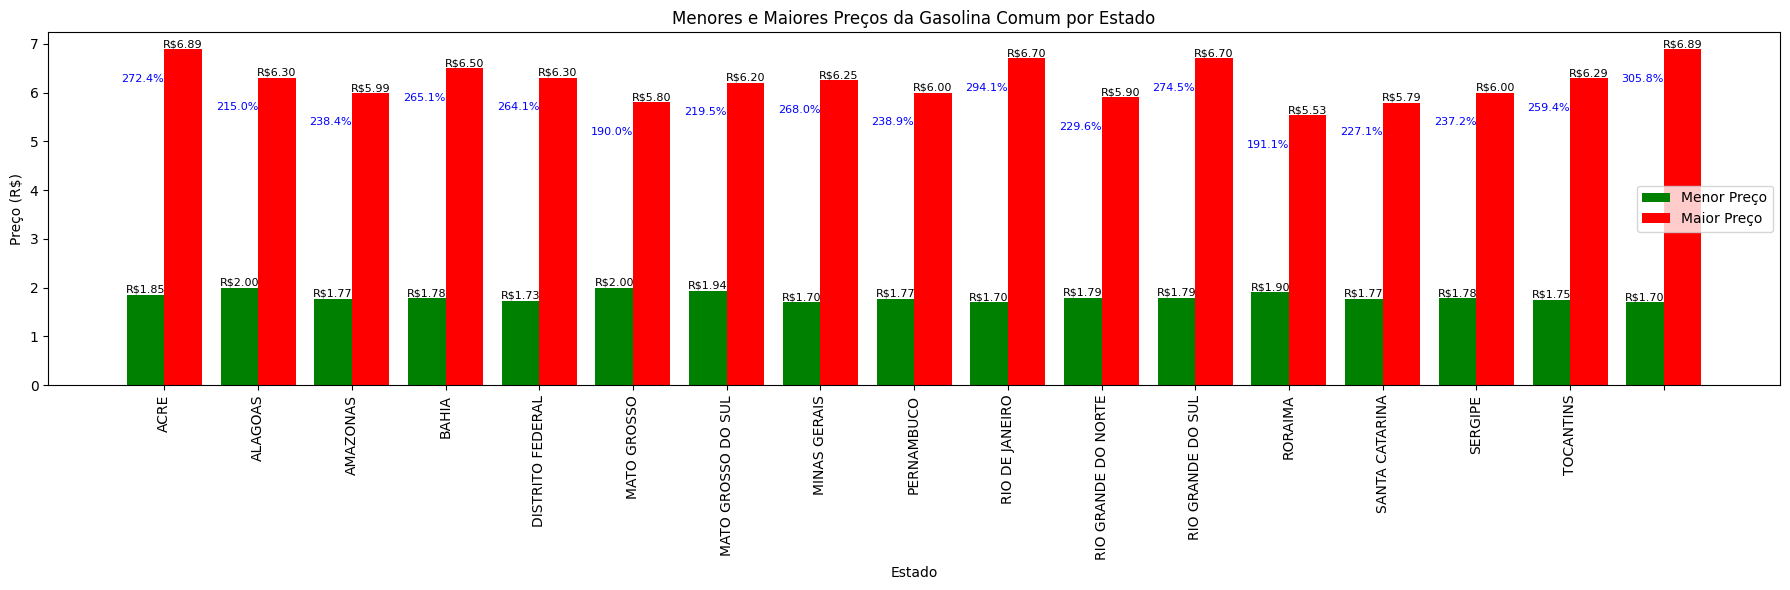

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Converter para Pandas
pdf = revenda_por_estado.toPandas()

# Ordenar por estado
pdf = pdf.sort_values(by="ESTADO")

# Calcular a porcentagem de aumento
pdf["PORCENTAGEM_AUMENTO"] = ((pdf["MAIOR_PRECO_REVENDA"] - pdf["MENOR_PRECO_REVENDA"]) / pdf["MENOR_PRECO_REVENDA"]) * 100

# Preparar posições
estados = pdf["ESTADO"]
x = np.arange(len(estados))  # índice de cada estado
largura = 0.4  # largura das barras

# Criar gráfico
plt.figure(figsize=(18, 6))
barras_menor = plt.bar(x - largura/2, pdf["MENOR_PRECO_REVENDA"], width=largura, label="Menor Preço", color="green")
barras_maior = plt.bar(x + largura/2, pdf["MAIOR_PRECO_REVENDA"], width=largura, label="Maior Preço", color="red")

# Adicionar valores nas barras
for barra in barras_menor:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, altura, f'R${altura:.2f}',
             ha='center', va='bottom', fontsize=8)

for barra in barras_maior:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, altura, f'R${altura:.2f}',
             ha='center', va='bottom', fontsize=8)

# Adicionar porcentagem de aumento acima das barras
for i, (x_pos, porc) in enumerate(zip(x, pdf["PORCENTAGEM_AUMENTO"])):
    plt.text(x_pos, __builtins__.max(pdf["MENOR_PRECO_REVENDA"].iloc[i], pdf["MAIOR_PRECO_REVENDA"].iloc[i]) - 0.5,
             f'{porc:.1f}%', ha='right', va='top', fontsize=8, color='blue')

# Ajustes visuais
plt.xticks(x, estados, rotation=90)
plt.title("Menores e Maiores Preços da Gasolina Comum por Estado")
plt.xlabel("Estado")
plt.ylabel("Preço (R$)")
plt.legend()
plt.tight_layout()
plt.show()

**SLIDE 5/3:** Maiores e menores valores da **gasolina comum** por **ESTADO** por **ANO** no *período avaliado*

In [ ]:
sql_query = """
    WITH gasolina_comum AS (
    SELECT fr.*, dp.PRODUTO, dt.ANO, dl.ESTADO
    FROM fat_revenda fr
    INNER JOIN dim_produto dp ON fr.ID_PRODUTO = dp.ID_PRODUTO
    INNER JOIN dim_tempo dt ON fr.ID_TEMPO = dt.ID_TEMPO
    INNER JOIN dim_local dl ON fr.ID_LOCALIZACAO = dl.ID_LOCALIZACAO
    WHERE dp.PRODUTO = 'GASOLINA COMUM'
)
    SELECT
        ESTADO,
        ANO,
        MIN(PRECO_MINIMO_REVENDA) AS PRECO_MINIMO_ANO,
        MAX(PRECO_MAXIMO_REVENDA) AS PRECO_MAXIMO_ANO
    FROM gasolina_comum
    GROUP BY ROLLUP(ESTADO, ANO)
    ORDER BY ESTADO, ANO
"""


gasolina_est_ano = spark.sql(sql_query)
gasolina_est_ano.show(50, truncate=False)

+--------+----+----------------+----------------+
|ESTADO  |ANO |PRECO_MINIMO_ANO|PRECO_MAXIMO_ANO|
+--------+----+----------------+----------------+
|NULL    |NULL|1.698           |6.89            |
|ACRE    |NULL|1.85            |6.89            |
|ACRE    |2004|1.85            |3.1             |
|ACRE    |2005|2.28            |3.5             |
|ACRE    |2006|2.77            |3.5             |
|ACRE    |2007|2.75            |3.33            |
|ACRE    |2008|2.85            |3.33            |
|ACRE    |2009|2.1             |3.38            |
|ACRE    |2010|2.459           |3.5             |
|ACRE    |2011|2.49            |3.56            |
|ACRE    |2012|2.92            |3.5             |
|ACRE    |2013|3.02            |3.7             |
|ACRE    |2014|3.19            |3.99            |
|ACRE    |2015|3.37            |4.55            |
|ACRE    |2016|3.92            |4.609           |
|ACRE    |2017|3.78            |5.2             |
|ACRE    |2018|4.29            |5.79            |


**Gráfico**

In [ ]:
import pandas as pd
import plotly.express as px

pandas_df = gasolina_est_ano.toPandas()

fig = px.line(
    pandas_df,
    x="ANO",
    y="PRECO_MAXIMO_ANO",
    color="ESTADO",
    title="Preço Máximo da Gasolina Comum por Estado e Ano",
    labels={"ANO": "Ano", "PRECO_MAXIMO_ANO": "Preço Máximo (R$)", "ESTADO": "Estado"}
)

# Define os estados que estarão visíveis por padrão
default_states = ["ACRE", "DISTRITO FEDERAL" ,"RIO DE JANEIRO",]
for trace in fig.data:
    trace.visible = True if trace.name in default_states else "legendonly"

# Layout para melhor legibilidade
fig.update_layout(
    xaxis_title="Ano",
    yaxis_title="Preço Máximo (R$)",
    legend_title="Estados",
    xaxis=dict(tickmode="linear"),  # Garante que o eixo x mostre todos os anos
    hovermode="closest",  # Mostra dados para o ponto mais próximo ao passar o mouse
    width=1200,  # Largura
    height=600   # Altura
)

# Atualizar aparência do rastreamento
fig.update_traces(
    mode="lines+markers",  # Mostrar linhas com marcadores
    hovertemplate="<b>%{fullData.name}</b><br>Ano: %{x}<br>Preço: R$%{y:.2f}<extra></extra>"
)

fig.show()

**SLIDE 5/4:** Maiores e menores valores da **gasolina comum** por **ESTADO** por **MES** por **ANO** no *período avaliado*

In [ ]:
sql_query = """
    SELECT
        dl.ESTADO,
        dt.ANO,
        dt.MES,
        MIN(fr.PRECO_MINIMO_REVENDA) AS PRECO_MINIMO_MES,
        MAX(fr.PRECO_MAXIMO_REVENDA) AS PRECO_MAXIMO_MES
    FROM
        fat_revenda fr
    JOIN
        dim_produto dp ON fr.ID_PRODUTO = dp.ID_PRODUTO
    JOIN
        dim_tempo dt ON fr.ID_TEMPO = dt.ID_TEMPO
    JOIN
        dim_local dl ON fr.ID_LOCALIZACAO = dl.ID_LOCALIZACAO
    WHERE
        dp.PRODUTO = 'GASOLINA COMUM'
    GROUP BY ROLLUP(dl.ESTADO, dt.ANO, dt.MES)
    ORDER BY
        dl.ESTADO,
        dt.ANO,
        dt.MES
"""

gasolina_est_mes_ano = spark.sql(sql_query)
gasolina_est_mes_ano.show(truncate=False)


+------+----+----+----------------+----------------+
|ESTADO|ANO |MES |PRECO_MINIMO_MES|PRECO_MAXIMO_MES|
+------+----+----+----------------+----------------+
|NULL  |NULL|NULL|1.698           |6.89            |
|ACRE  |NULL|NULL|1.85            |6.89            |
|ACRE  |2004|NULL|1.85            |3.1             |
|ACRE  |2004|5   |1.85            |2.85            |
|ACRE  |2004|6   |2.15            |2.85            |
|ACRE  |2004|7   |2.25            |3.0             |
|ACRE  |2004|8   |2.25            |3.0             |
|ACRE  |2004|9   |2.35            |3.0             |
|ACRE  |2004|10  |2.1             |3.1             |
|ACRE  |2004|11  |2.36            |3.1             |
|ACRE  |2004|12  |2.56            |3.1             |
|ACRE  |2005|NULL|2.28            |3.5             |
|ACRE  |2005|1   |2.56            |3.22            |
|ACRE  |2005|2   |2.6             |3.22            |
|ACRE  |2005|3   |2.36            |3.22            |
|ACRE  |2005|4   |2.58            |3.2        

**Gráfico**

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, min, max
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown

# Filter out rows where 'ESTADO', 'ANO', or 'MES' is null before converting to pandas
gasolina_pd = gasolina_est_mes_ano.filter(col("ESTADO").isNotNull() & col("ANO").isNotNull() & col("MES").isNotNull()).toPandas()   # Converter resultado Spark para DataFrame Pandas

# Ensure 'MES' and 'ANO' are treated as strings before zfill
gasolina_pd["MES"] = gasolina_pd["MES"].astype(str).str.zfill(2)
gasolina_pd["ANO"] = gasolina_pd["ANO"].astype(str)

# Create MES_ANO column, handling potential nulls
gasolina_pd["MES_ANO"] = gasolina_pd.apply(lambda row: f"{row['MES']}/{row['ANO']}" if pd.notna(row['MES']) and pd.notna(row['ANO']) else None, axis=1)


# Lista de estados
estados = sorted(gasolina_pd["ESTADO"].unique())
anos = sorted(gasolina_pd["ANO"].unique())

# Função para exibir gráfico interativo
def plot_gasolina(estado, ano):
    # df = gasolina_pd[gasolina_pd["ESTADO"] == estado]

     # Filtrar DataFrame por estado e ano selecionados
    df = gasolina_pd[(gasolina_pd["ESTADO"] == estado) & (gasolina_pd["ANO"] == ano)].copy()

    # Ordenar pelos meses corretamente (caso estejam desordenados no DataFrame)
    df["MES_NUM"] = df["MES"].astype(int)
    df = df.sort_values("MES_NUM")

    # Criar coluna MES_ANO again in case it was dropped or modified
    df["MES_ANO"] = df["MES"] + "/" + df["ANO"]


    plt.figure(figsize=(12, 6))
    plt.plot(df["MES_ANO"], df["PRECO_MINIMO_MES"], label="Preço Mínimo", color="#1f77b4", linewidth=2)
    plt.plot(df["MES_ANO"], df["PRECO_MAXIMO_MES"], label="Preço Máximo", color="#ff7f0e", linewidth=2)

    plt.title(f"Preço da Gasolina Comum em {estado} no ano de {ano}")
    plt.xlabel("Mês")
    plt.ylabel("Preço (R$)")
    plt.xticks(rotation=90, ha="right")
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

# Menu interativo por estado
interact(plot_gasolina,
         estado=Dropdown(options=estados, description="Estado:"),
         ano=Dropdown(options=anos, description="Ano:"));

interactive(children=(Dropdown(description='Estado:', options=('ACRE', 'ALAGOAS', 'AMAZONAS', 'BAHIA', 'DISTRI…

**SLIDE 5/5:** Maiores e menores valores de por **TIPO DE COMBUSTÍVEL** por **ESTADO** por **ANO** no período avaliado

In [ ]:
sql_query = """
    SELECT
        dp.PRODUTO,
        dl.ESTADO,
        dt.ANO,
        MIN(fr.PRECO_MINIMO_REVENDA) AS PRECO_MINIMO_ANO,
        MAX(fr.PRECO_MAXIMO_REVENDA) AS PRECO_MAXIMO_ANO
    FROM
        fat_revenda fr
    JOIN
        dim_produto dp ON fr.ID_PRODUTO = dp.ID_PRODUTO
    JOIN
        dim_tempo dt ON fr.ID_TEMPO = dt.ID_TEMPO
    JOIN
        dim_local dl ON fr.ID_LOCALIZACAO = dl.ID_LOCALIZACAO
    GROUP BY ROLLUP(dp.PRODUTO, dl.ESTADO, dt.ANO)
    ORDER BY
        dp.PRODUTO,
        dl.ESTADO,
        dt.ANO
    """


combustivel_est_ano = spark.sql(sql_query)
combustivel_est_ano.show(truncate=False)

+----------------+------+----+----------------+----------------+
|PRODUTO         |ESTADO|ANO |PRECO_MINIMO_ANO|PRECO_MAXIMO_ANO|
+----------------+------+----+----------------+----------------+
|NULL            |NULL  |NULL|0.0016          |6.89            |
|ETANOL HIDRATADO|NULL  |NULL|0.74            |6.299           |
|ETANOL HIDRATADO|ACRE  |NULL|1.38            |6.18            |
|ETANOL HIDRATADO|ACRE  |2004|1.5             |2.3             |
|ETANOL HIDRATADO|ACRE  |2005|1.38            |2.41            |
|ETANOL HIDRATADO|ACRE  |2006|1.91            |3.15            |
|ETANOL HIDRATADO|ACRE  |2007|1.84            |2.78            |
|ETANOL HIDRATADO|ACRE  |2008|1.99            |2.85            |
|ETANOL HIDRATADO|ACRE  |2009|1.85            |2.99            |
|ETANOL HIDRATADO|ACRE  |2010|1.85            |2.99            |
|ETANOL HIDRATADO|ACRE  |2011|2.12            |3.15            |
|ETANOL HIDRATADO|ACRE  |2012|2.255           |3.12            |
|ETANOL HIDRATADO|ACRE  |

**Gráfico**

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, min, max
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown
#-------------------------------------------------------------------------

# Filtrar linhas onde 'ESTADO', 'PRODUTO' ou 'ANO' são nulos antes de converter para pandas
combustiveis_pd = combustivel_est_ano.filter(
    col("ESTADO").isNotNull() & col("PRODUTO").isNotNull() & col("ANO").isNotNull()
).toPandas()  # Converter resultado Spark para DataFrame Pandas


# Adicionar coluna ANO para rótulos
combustiveis_pd["ANO"] = combustiveis_pd["ANO"].astype(str)

# Lista de estados e combustíveis únicos para os menus suspensos
estados = sorted(combustiveis_pd["ESTADO"].unique())
combustiveis_lista = sorted(combustiveis_pd["PRODUTO"].unique())

# Função para criar o gráfico do estado e combustível selecionados
def plot_combustivel(estado, combustivel):
    # Filtrar dados do estado e combustível selecionados
    filtro_df = combustiveis_pd[(combustiveis_pd["ESTADO"] == estado) & (combustiveis_pd["PRODUTO"] == combustivel)].sort_values(by="ANO")

    # Verificar se há dados
    if filtro_df.empty:
        print(f"Sem dados para {combustivel} em {estado}")
        return

    # Criar figura
    plt.figure(figsize=(12, 6))

    # Plotar linhas para preços mínimo e máximo usando ANO para dados anuais
    plt.plot(filtro_df["ANO"], filtro_df["PRECO_MINIMO_ANO"], label="Preço Mínimo", color="#1f77b4", linewidth=2)
    plt.plot(filtro_df["ANO"], filtro_df["PRECO_MAXIMO_ANO"], label="Preço Máximo", color="#ff7f0e", linewidth=2)

    # Personalizar o eixo x para mostrar apenas anos
    plt.xticks(rotation=90, ha="right")

    # Personalizar o gráfico
    plt.title(f"Preço Mínimo e Máximo de {combustivel} em {estado}")
    plt.xlabel("Ano")
    plt.ylabel("Preço (R$)")
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()

    # Mostrar o gráfico
    plt.show()

# Criar menus suspensos interativos
interact(plot_combustivel,
         estado=Dropdown(options=estados, description="Estado:"),
         combustivel=Dropdown(options=combustiveis_lista, description="Combustível:"));

interactive(children=(Dropdown(description='Estado:', options=('ACRE', 'ALAGOAS', 'AMAZONAS', 'BAHIA', 'DISTRI…

# Questões do slide 6

OBSERVAÇÃO: o combustível mais barato é aquele cujo **preço médio** foi
inferior ao preço médio dos demais tipos de combustível na **maior
quantidade de vezes**  considerando todas as comparações realizadas entre
eles

**SLIDE 6/1:** Qual o combustível mais barato no Brasil no período avaliado?

In [ ]:
#Usar função RANK para identificar o mais barato em cada grupo
sql_query = """
    WITH precos AS (
        SELECT
            dp.PRODUTO,
            dl.ESTADO,
            dt.ANO,
            dt.MES,
            AVG(fr.PRECO_MEDIO_REVENDA) AS PRECO_MEDIO
        FROM
            fat_revenda fr
        JOIN
            dim_produto dp ON fr.ID_PRODUTO = dp.ID_PRODUTO
        JOIN
            dim_tempo dt ON fr.ID_TEMPO = dt.ID_TEMPO
        JOIN
            dim_local dl ON fr.ID_LOCALIZACAO = dl.ID_LOCALIZACAO
        GROUP BY
            dp.PRODUTO, dl.ESTADO, dt.ANO, dt.MES
    ),
    ranked AS (
        SELECT
            *,
            RANK() OVER (PARTITION BY ESTADO, ANO, MES ORDER BY PRECO_MEDIO ASC) AS RANK_PRECO
        FROM precos
    ),
    mais_barato AS (
        SELECT PRODUTO
        FROM ranked
        WHERE RANK_PRECO = 1
    )
    SELECT
        PRODUTO,
        COUNT(*) AS QUANTIDADE_VEZES_MAIS_BARATO
    FROM
        mais_barato
    GROUP BY
        PRODUTO
    ORDER BY
        QUANTIDADE_VEZES_MAIS_BARATO DESC
"""
combustivel_mais_barato = spark.sql(sql_query)
combustivel_mais_barato.show(truncate=False)

# Consulta 1: Mais barato em valor absoluto nacional
query_preco_nacional = """
WITH media_nacional AS (
    SELECT
        dp.PRODUTO,
        ROUND(AVG(fr.PRECO_MEDIO_REVENDA), 5) AS PRECO_MEDIO_NACIONAL
    FROM
        fat_revenda fr
    JOIN
        dim_produto dp ON fr.ID_PRODUTO = dp.ID_PRODUTO
    GROUP BY
        dp.PRODUTO
)
SELECT
    PRODUTO,
    PRECO_MEDIO_NACIONAL
FROM
    media_nacional
ORDER BY
    PRECO_MEDIO_NACIONAL ASC
LIMIT 1
"""
print("Combustível mais barato no Brasil no período avaliado:")
mais_barato_absoluto = spark.sql(query_preco_nacional)
mais_barato_absoluto.show(truncate=False)

+----------------+----------------------------+
|PRODUTO         |QUANTIDADE_VEZES_MAIS_BARATO|
+----------------+----------------------------+
|GNV             |2394                        |
|GLP             |785                         |
|ETANOL HIDRATADO|46                          |
|OLEO DIESEL     |23                          |
+----------------+----------------------------+

Combustível mais barato no Brasil no período avaliado:
+-------+--------------------+
|PRODUTO|PRECO_MEDIO_NACIONAL|
+-------+--------------------+
|GNV    |0.00509             |
+-------+--------------------+



**6/2:** Qual o combustível mais barato por estado por ano no período
avaliado?

In [ ]:
sql_query = """
    WITH precos AS (
        SELECT
            dp.PRODUTO,
            dl.ESTADO,
            dt.ANO,
            AVG(fr.PRECO_MEDIO_REVENDA) AS PRECO_MEDIO
        FROM
            fat_revenda fr
        JOIN
            dim_produto dp ON fr.ID_PRODUTO = dp.ID_PRODUTO
        JOIN
            dim_tempo dt ON fr.ID_TEMPO = dt.ID_TEMPO
        JOIN
            dim_local dl ON fr.ID_LOCALIZACAO = dl.ID_LOCALIZACAO
        GROUP BY ROLLUP(dp.PRODUTO, dl.ESTADO, dt.ANO)
    ),
    menor_preco AS (
        SELECT *,
            RANK() OVER (PARTITION BY ESTADO, ANO ORDER BY PRECO_MEDIO ASC) AS RANK_PRECO
        FROM precos
    )
    SELECT
        ESTADO,
        ANO,
        PRODUTO AS COMBUSTIVEL_MAIS_BARATO,
        ROUND(PRECO_MEDIO, 3) AS PRECO_MEDIO
    FROM
        menor_preco
    WHERE
        RANK_PRECO = 1
    ORDER BY
        ESTADO, ANO
"""

mais_barato_por_estado_ano = spark.sql(sql_query)
mais_barato_por_estado_ano.show(truncate=False)

+------+----+-----------------------+-----------+
|ESTADO|ANO |COMBUSTIVEL_MAIS_BARATO|PRECO_MEDIO|
+------+----+-----------------------+-----------+
|NULL  |NULL|GNV                    |0.005      |
|ACRE  |NULL|GNV                    |0.006      |
|ACRE  |2004|GLP                    |1.586      |
|ACRE  |2005|GLP                    |1.532      |
|ACRE  |2006|GLP                    |1.59       |
|ACRE  |2007|GLP                    |1.626      |
|ACRE  |2008|GLP                    |1.653      |
|ACRE  |2009|GNV                    |0.006      |
|ACRE  |2010|GNV                    |0.006      |
|ACRE  |2011|GLP                    |1.831      |
|ACRE  |2012|GLP                    |1.892      |
|ACRE  |2013|GLP                    |1.99       |
|ACRE  |2014|GLP                    |2.097      |
|ACRE  |2015|GLP                    |2.296      |
|ACRE  |2016|GLP                    |2.472      |
|ACRE  |2017|GLP                    |2.759      |
|ACRE  |2018|GLP                    |3.277      |


**6/3:** Qual o combustível mais barato por ESTADO por MÊS e ANO no período
avaliado?

In [ ]:
sql_query = """
    WITH precos AS (
        SELECT
            dp.PRODUTO,
            dl.ESTADO,
            dt.ANO,
            dt.MES,
            AVG(fr.PRECO_MEDIO_REVENDA) AS PRECO_MEDIO
        FROM
            fat_revenda fr
        JOIN
            dim_produto dp ON fr.ID_PRODUTO = dp.ID_PRODUTO
        JOIN
            dim_tempo dt ON fr.ID_TEMPO = dt.ID_TEMPO
        JOIN
            dim_local dl ON fr.ID_LOCALIZACAO = dl.ID_LOCALIZACAO
        GROUP BY ROLLUP(dp.PRODUTO, dl.ESTADO, dt.ANO, dt.MES)
    ),
    menor_preco AS (
        SELECT
            *,
            RANK() OVER (PARTITION BY ESTADO, ANO, MES ORDER BY PRECO_MEDIO ASC) AS RANK_PRECO
        FROM precos
    )
    SELECT
        ESTADO,
        ANO,
        MES,
        PRODUTO AS COMBUSTIVEL_MAIS_BARATO,
        ROUND(PRECO_MEDIO, 3) AS PRECO_MEDIO
    FROM
        menor_preco
    WHERE
        RANK_PRECO = 1
    ORDER BY
        ESTADO, ANO, MES
"""

mais_barato_estado_mes_ano = spark.sql(sql_query)
mais_barato_estado_mes_ano.show(50, truncate=False)


+------+----+----+-----------------------+-----------+
|ESTADO|ANO |MES |COMBUSTIVEL_MAIS_BARATO|PRECO_MEDIO|
+------+----+----+-----------------------+-----------+
|NULL  |NULL|NULL|GNV                    |0.005      |
|ACRE  |NULL|NULL|GNV                    |0.006      |
|ACRE  |2004|NULL|GLP                    |1.586      |
|ACRE  |2004|5   |GLP                    |1.625      |
|ACRE  |2004|6   |GLP                    |1.615      |
|ACRE  |2004|7   |GLP                    |1.614      |
|ACRE  |2004|8   |GLP                    |1.613      |
|ACRE  |2004|9   |GLP                    |1.617      |
|ACRE  |2004|10  |GLP                    |1.589      |
|ACRE  |2004|11  |GLP                    |1.488      |
|ACRE  |2004|12  |GLP                    |1.52       |
|ACRE  |2005|NULL|GLP                    |1.532      |
|ACRE  |2005|1   |GLP                    |1.529      |
|ACRE  |2005|2   |GLP                    |1.526      |
|ACRE  |2005|3   |GLP                    |1.527      |
|ACRE  |20

**6/4:** Quais os **top-2 combustíveis mais baratos** por estado por ano no
período avaliado?

In [ ]:
sql_query = """
    WITH precos AS (
        SELECT
            dp.PRODUTO,
            dl.ESTADO,
            dt.ANO,
            AVG(fr.PRECO_MEDIO_REVENDA) AS PRECO_MEDIO
        FROM
            fat_revenda fr
        JOIN
            dim_produto dp ON fr.ID_PRODUTO = dp.ID_PRODUTO
        JOIN
            dim_tempo dt ON fr.ID_TEMPO = dt.ID_TEMPO
        JOIN
            dim_local dl ON fr.ID_LOCALIZACAO = dl.ID_LOCALIZACAO
        GROUP BY ROLLUP(dp.PRODUTO, dl.ESTADO, dt.ANO)
    ),
    ranking AS (
        SELECT
            *,
            RANK() OVER (PARTITION BY ESTADO, ANO ORDER BY PRECO_MEDIO ASC) AS RANK_PRECO
        FROM precos
        WHERE PRODUTO IS NOT NULL AND ESTADO IS NOT NULL AND ANO IS NOT NULL  -- evita totais no ranking
    )
    SELECT
        ESTADO,
        ANO,
        PRODUTO AS COMBUSTIVEL,
        ROUND(PRECO_MEDIO, 3) AS PRECO_MEDIO,
        RANK_PRECO
    FROM
        ranking
    WHERE
        RANK_PRECO <= 2
    ORDER BY
        ESTADO, ANO, RANK_PRECO

"""

top2_combustiveis = spark.sql(sql_query)
top2_combustiveis.show(50, truncate=False)

+-------+----+----------------+-----------+----------+
|ESTADO |ANO |COMBUSTIVEL     |PRECO_MEDIO|RANK_PRECO|
+-------+----+----------------+-----------+----------+
|ACRE   |2004|GLP             |1.586      |1         |
|ACRE   |2004|OLEO DIESEL     |1.842      |2         |
|ACRE   |2005|GLP             |1.532      |1         |
|ACRE   |2005|ETANOL HIDRATADO|1.948      |2         |
|ACRE   |2006|GLP             |1.59       |1         |
|ACRE   |2006|ETANOL HIDRATADO|2.258      |2         |
|ACRE   |2007|GLP             |1.626      |1         |
|ACRE   |2007|ETANOL HIDRATADO|2.067      |2         |
|ACRE   |2008|GLP             |1.653      |1         |
|ACRE   |2008|ETANOL HIDRATADO|2.1        |2         |
|ACRE   |2009|GNV             |0.006      |1         |
|ACRE   |2009|GLP             |1.687      |2         |
|ACRE   |2010|GNV             |0.006      |1         |
|ACRE   |2010|GLP             |1.759      |2         |
|ACRE   |2011|GLP             |1.831      |1         |
|ACRE   |2

# SLIDE 7

A proporção do preço médio de Etanol/Gasolina gera um número real,
sendo que se esse valor for maior que 0.7, então a gasolina apresenta maior
rendimento. Caso contrário, o etanol apresenta maior rendimento (essa é apenas uma hipótese generalista e simplificada para este exercício).

**7/1:** No Brasil, por ano, compensa abastecer o carro
com Etanol ou Gasolina?

In [ ]:
sql_query = """
WITH precos AS (
    SELECT
        dp.PRODUTO,
        dt.ANO,
        AVG(fr.PRECO_MEDIO_REVENDA) AS PRECO_MEDIO
    FROM
        fat_revenda fr
    JOIN
        dim_produto dp ON fr.ID_PRODUTO = dp.ID_PRODUTO
    JOIN
        dim_tempo dt ON fr.ID_TEMPO = dt.ID_TEMPO
    WHERE
        dp.PRODUTO IN ('ETANOL HIDRATADO', 'GASOLINA COMUM')
    GROUP BY
        dp.PRODUTO, dt.ANO
),
pivoted AS (
    SELECT
        MAX(CASE WHEN PRODUTO = 'ETANOL HIDRATADO' THEN PRECO_MEDIO END) AS PRECO_ETANOL,
        MAX(CASE WHEN PRODUTO = 'GASOLINA COMUM' THEN PRECO_MEDIO END) AS PRECO_GASOLINA,
        ANO
    FROM precos
    GROUP BY ANO
)
SELECT
    p.ANO,
    ROUND(p.PRECO_ETANOL, 3) AS PRECO_MEDIO_ETANOL,
    ROUND(p.PRECO_GASOLINA, 3) AS PRECO_MEDIO_GASOLINA,
    ROUND(p.PRECO_ETANOL / p.PRECO_GASOLINA, 3) AS PROPORCAO,
    CASE
        WHEN p.PRECO_ETANOL / p.PRECO_GASOLINA > 0.7 THEN dp_gas.PRODUTO
        ELSE dp_eta.PRODUTO
    END AS COMBUSTIVEL_MAIS_VANTAJOSO
FROM
    pivoted p
JOIN dim_produto dp_eta ON dp_eta.PRODUTO = 'ETANOL HIDRATADO'
JOIN dim_produto dp_gas ON dp_gas.PRODUTO = 'GASOLINA COMUM'
ORDER BY
    p.ANO

"""

proporcao_brasil_ano = spark.sql(sql_query)
proporcao_brasil_ano.show(truncate=False)


+----+------------------+--------------------+---------+--------------------------+
|ANO |PRECO_MEDIO_ETANOL|PRECO_MEDIO_GASOLINA|PROPORCAO|COMBUSTIVEL_MAIS_VANTAJOSO|
+----+------------------+--------------------+---------+--------------------------+
|2004|1.527             |2.243               |0.681    |ETANOL HIDRATADO          |
|2005|1.715             |2.469               |0.695    |ETANOL HIDRATADO          |
|2006|1.984             |2.689               |0.738    |GASOLINA COMUM            |
|2007|1.753             |2.631               |0.666    |ETANOL HIDRATADO          |
|2008|1.775             |2.628               |0.676    |ETANOL HIDRATADO          |
|2009|1.782             |2.636               |0.676    |ETANOL HIDRATADO          |
|2010|1.966             |2.692               |0.731    |GASOLINA COMUM            |
|2011|2.225             |2.806               |0.793    |GASOLINA COMUM            |
|2012|2.26              |2.825               |0.8      |GASOLINA COMUM      

**7/2:** Por **ESTADO** e por **ANO**, compensa abastecer o carro
com Etanol ou Gasolina?

In [ ]:
sql_query = """
WITH precos AS (
    SELECT
        dp.PRODUTO,
        dl.ESTADO,
        dt.ANO,
        AVG(fr.PRECO_MEDIO_REVENDA) AS PRECO_MEDIO
    FROM
        fat_revenda fr
    JOIN dim_produto dp ON fr.ID_PRODUTO = dp.ID_PRODUTO
    JOIN dim_tempo dt ON fr.ID_TEMPO = dt.ID_TEMPO
    JOIN dim_local dl ON fr.ID_LOCALIZACAO = dl.ID_LOCALIZACAO
    WHERE
        dp.PRODUTO IN ('ETANOL HIDRATADO', 'GASOLINA COMUM')
    GROUP BY
        dp.PRODUTO, dl.ESTADO, dt.ANO
),
pivoted AS (
    SELECT
        ESTADO,
        ANO,
        MAX(CASE WHEN PRODUTO = 'ETANOL HIDRATADO' THEN PRECO_MEDIO END) AS PRECO_ETANOL,
        MAX(CASE WHEN PRODUTO = 'GASOLINA COMUM' THEN PRECO_MEDIO END) AS PRECO_GASOLINA
    FROM precos
    GROUP BY ESTADO, ANO
)
SELECT
    ESTADO,
    ANO,
    ROUND(PRECO_ETANOL, 3) AS PRECO_MEDIO_ETANOL,
    ROUND(PRECO_GASOLINA, 3) AS PRECO_MEDIO_GASOLINA,
    ROUND(PRECO_ETANOL / PRECO_GASOLINA, 3) AS PROPORCAO,
    CASE
        WHEN PRECO_ETANOL / PRECO_GASOLINA > 0.7 THEN 'GASOLINA'
        ELSE 'ETANOL HIDRATADO'
    END AS COMBUSTIVEL_MAIS_VANTAJOSO
FROM
    pivoted
ORDER BY
    ESTADO, ANO
"""

proporcao_estado_ano = spark.sql(sql_query)
proporcao_estado_ano.show(20, truncate=False)



+-------+----+------------------+--------------------+---------+--------------------------+
|ESTADO |ANO |PRECO_MEDIO_ETANOL|PRECO_MEDIO_GASOLINA|PROPORCAO|COMBUSTIVEL_MAIS_VANTAJOSO|
+-------+----+------------------+--------------------+---------+--------------------------+
|ACRE   |2004|1.901             |2.532               |0.751    |GASOLINA                  |
|ACRE   |2005|1.948             |2.661               |0.732    |GASOLINA                  |
|ACRE   |2006|2.258             |2.945               |0.767    |GASOLINA                  |
|ACRE   |2007|2.067             |2.92                |0.708    |GASOLINA                  |
|ACRE   |2008|2.1               |2.966               |0.708    |GASOLINA                  |
|ACRE   |2009|2.112             |2.964               |0.713    |GASOLINA                  |
|ACRE   |2010|2.409             |2.986               |0.807    |GASOLINA                  |
|ACRE   |2011|2.486             |3.113               |0.799    |GASOLINA        

**View**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown

resultado_pd = proporcao_estado_ano.toPandas()

# Preparar listas para os menus suspensos
estados = sorted(resultado_pd["ESTADO"].unique())
anos = sorted(resultado_pd["ANO"].unique())

def plot_combustivel(estado, ano):
    # Filtrar dados pelo filtro selecionado
    filtro = (resultado_pd["ESTADO"] == estado) & (resultado_pd["ANO"] == ano)
    df_filtrado = resultado_pd[filtro]

    if df_filtrado.empty:
        print("Nenhum dado para os filtros selecionados.")
        return

    row = df_filtrado.iloc[0]

    combustivel = row["COMBUSTIVEL_MAIS_VANTAJOSO"]
    preco_etanol = row["PRECO_MEDIO_ETANOL"]
    preco_gasolina = row["PRECO_MEDIO_GASOLINA"]
    proporcao = row["PROPORCAO"]

    print(f"Estado: {estado} | Ano: {ano}")
    print(f"Combustível mais vantajoso: {combustivel}")
    print(f"Preço médio Etanol: R$ {preco_etanol:.3f}")
    print(f"Preço médio Gasolina: R$ {preco_gasolina:.3f}")
    print(f"Proporção Etanol/Gasolina: {proporcao:.3f}")

    # Gráfico de barras comparando preços
    plt.figure(figsize=(3,2))
    plt.bar(["Etanol", "Gasolina"], [preco_etanol, preco_gasolina], color=["#2ca02c", "#1f77b4"])
    plt.title(f"Preço Médio por Combustível\n{estado} - {ano}")
    plt.ylabel("Preço Médio (R$)")
    plt.show()

# Criar interface interativa
interact(
    plot_combustivel,
    estado=Dropdown(options=estados, description="Estado"),
    ano=Dropdown(options=anos, description="Ano")
);

interactive(children=(Dropdown(description='Estado', options=('ACRE', 'ALAGOAS', 'AMAZONAS', 'BAHIA', 'DISTRIT…

**7/3:** Por **ESTADO** por **MÊS** e por **ANO**, compensa abastecer
o carro com Etanol ou Gasolina?

In [ ]:
sql_query = """
WITH precos AS (
    SELECT
        dp.PRODUTO,
        dl.ESTADO,
        dt.ANO,
        dt.MES,
        AVG(fr.PRECO_MEDIO_REVENDA) AS PRECO_MEDIO
    FROM
        fat_revenda fr
    JOIN dim_produto dp ON fr.ID_PRODUTO = dp.ID_PRODUTO
    JOIN dim_tempo dt ON fr.ID_TEMPO = dt.ID_TEMPO
    JOIN dim_local dl ON fr.ID_LOCALIZACAO = dl.ID_LOCALIZACAO
    WHERE
        dp.PRODUTO IN ('ETANOL HIDRATADO', 'GASOLINA COMUM')
    GROUP BY
        dp.PRODUTO, dl.ESTADO, dt.ANO, dt.MES
),
pivoted AS (
    SELECT
        ESTADO,
        ANO,
        MES,
        MAX(CASE WHEN PRODUTO = 'ETANOL HIDRATADO' THEN PRECO_MEDIO END) AS PRECO_ETANOL,
        MAX(CASE WHEN PRODUTO = 'GASOLINA COMUM' THEN PRECO_MEDIO END) AS PRECO_GASOLINA
    FROM precos
    GROUP BY ESTADO, ANO, MES
)
SELECT
    ESTADO,
    ANO,
    MES,
    ROUND(PRECO_ETANOL, 3) AS PRECO_MEDIO_ETANOL,
    ROUND(PRECO_GASOLINA, 3) AS PRECO_MEDIO_GASOLINA,
    ROUND(PRECO_ETANOL / PRECO_GASOLINA, 3) AS PROPORCAO,
    CASE
        WHEN PRECO_ETANOL / PRECO_GASOLINA > 0.7 THEN 'GASOLINA'
        ELSE 'ETANOL HIDRATADO'
    END AS COMBUSTIVEL_MAIS_VANTAJOSO
FROM
    pivoted
ORDER BY
    ESTADO, ANO, MES
"""

proporcao_estado_anos_mes = spark.sql(sql_query)
proporcao_estado_anos_mes.show(20, truncate=False)

+------+----+---+------------------+--------------------+---------+--------------------------+
|ESTADO|ANO |MES|PRECO_MEDIO_ETANOL|PRECO_MEDIO_GASOLINA|PROPORCAO|COMBUSTIVEL_MAIS_VANTAJOSO|
+------+----+---+------------------+--------------------+---------+--------------------------+
|ACRE  |2004|5  |1.805             |2.425               |0.745    |GASOLINA                  |
|ACRE  |2004|6  |1.856             |2.467               |0.753    |GASOLINA                  |
|ACRE  |2004|7  |1.921             |2.53                |0.759    |GASOLINA                  |
|ACRE  |2004|8  |1.924             |2.548               |0.755    |GASOLINA                  |
|ACRE  |2004|9  |1.926             |2.569               |0.75     |GASOLINA                  |
|ACRE  |2004|10 |1.905             |2.543               |0.749    |GASOLINA                  |
|ACRE  |2004|11 |1.886             |2.529               |0.746    |GASOLINA                  |
|ACRE  |2004|12 |1.976             |2.638         

**View**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown

resultado_pd = proporcao_estado_anos_mes.toPandas()

# Preparar listas para os menus suspensos
estados = sorted(resultado_pd["ESTADO"].unique())
anos = sorted(resultado_pd["ANO"].unique())
meses = sorted(resultado_pd["MES"].unique())

def plot_combustivel(estado, ano, mes):
    # Filtrar dados pelo filtro selecionado
    filtro = (resultado_pd["ESTADO"] == estado) & (resultado_pd["ANO"] == ano) & (resultado_pd["MES"] == mes)
    df_filtrado = resultado_pd[filtro]

    if df_filtrado.empty:
        print("Nenhum dado para os filtros selecionados.")
        return

    row = df_filtrado.iloc[0]

    combustivel = row["COMBUSTIVEL_MAIS_VANTAJOSO"]
    preco_etanol = row["PRECO_MEDIO_ETANOL"]
    preco_gasolina = row["PRECO_MEDIO_GASOLINA"]
    proporcao = row["PROPORCAO"]

    print(f"Estado: {estado} | Ano: {ano} | Mês: {mes}")
    print(f"Combustível mais vantajoso: {combustivel}")
    print(f"Preço médio Etanol: R$ {preco_etanol:.3f}")
    print(f"Preço médio Gasolina: R$ {preco_gasolina:.3f}")
    print(f"Proporção Etanol/Gasolina: {proporcao:.3f}")

    # Gráfico de barras comparando preços
    plt.figure(figsize=(3,2))
    plt.bar(["Etanol", "Gasolina"], [preco_etanol, preco_gasolina], color=["#2ca02c", "#1f77b4"])
    plt.title(f"Preço Médio por Combustível\n{estado} - {mes}/{ano}")
    plt.ylabel("Preço Médio (R$)")
    plt.show()

# Criar interface interativa
interact(
    plot_combustivel,
    estado=Dropdown(options=estados, value="ACRE" ,description="Estado"),
    ano=Dropdown(options=anos, value=2004, description="Ano"),
    mes=Dropdown(options=meses, value=5, description="Mês"),
);


interactive(children=(Dropdown(description='Estado', options=('ACRE', 'ALAGOAS', 'AMAZONAS', 'BAHIA', 'DISTRIT…

# SLIDE **8**
Realize uma Análise dos Dados para responder:
○ A frota de veículos no Brasil tem 123.974.520 automotores. Suponha
que o gasto de combustível no país seja aproximado pela seguinte
proporção:
* 50% de veículos que rodam a diesel
* 25% de veículos a gasolina
* 20% de veículos flex (gasolina ou etanol)
* 05% de veículos a etanol


---




**8/1:** Qual o valor do ticket médio (valor pago) por litro de combustível por
estado por mês e por ano?

In [ ]:
from pyspark.sql.functions import col, year, month, avg, first, format_number, coalesce

# Filtrar apenas os combustíveis relevantes
# Corrigindo os nomes dos produtos para corresponder aos valores reais no DataFrame
combustiveis_interesse = df.filter(col("PRODUTO").isin([
    "OLEO DIESEL", "OLEO DIESEL S10", "GASOLINA COMUM", "ETANOL HIDRATADO"
]))

# Add a line to check the distinct values in the filtered DataFrame
combustiveis_interesse.select("PRODUTO").distinct().show(truncate=False)

# Adicionar colunas de ano e mês
df_tempo = combustiveis_interesse.withColumn("ano", year(col("DATA INICIAL"))) \
                                 .withColumn("mes", month(col("DATA INICIAL")))

# Calcular preço médio por estado, mês, ano e produto
preco_medio = df_tempo.groupBy("ano", "mes", "ESTADO", "PRODUTO").agg(
    avg("PREÇO MÉDIO REVENDA").alias("preco_medio")
)

# Pivot para colunas separadas para cada combustível
precos_pivot = preco_medio.groupBy("ano", "mes", "ESTADO").pivot("PRODUTO").agg(first("preco_medio"))

resultado = precos_pivot.withColumn(
    "ticket_medio",
    (coalesce(col("OLEO DIESEL"), col("OLEO DIESEL S10")) * 0.50) +
    (col("GASOLINA COMUM") * 0.35) +
    (col("ETANOL HIDRATADO") * 0.15)
).orderBy("ano", "mes", "ESTADO")

# Mostrar resultados com formatação
resultado.select(
    "ano",
    "mes",
    "ESTADO",
    # Usando o alias 'preco_diesel' para a coluna combinada de Diesel prices
    format_number(coalesce(col("OLEO DIESEL"), col("OLEO DIESEL S10")), 3).alias("preco_diesel"),
    format_number(col("GASOLINA COMUM"), 3).alias("preco_gasolina"),
    format_number(col("ETANOL HIDRATADO"), 3).alias("preco_etanol"),
    format_number(col("ticket_medio"), 3).alias("ticket_medio_por_litro")
).show(truncate=False)

+----------------+
|PRODUTO         |
+----------------+
|ETANOL HIDRATADO|
|OLEO DIESEL S10 |
|GASOLINA COMUM  |
|OLEO DIESEL     |
+----------------+

+----+---+-------------------+------------+--------------+------------+----------------------+
|ano |mes|ESTADO             |preco_diesel|preco_gasolina|preco_etanol|ticket_medio_por_litro|
+----+---+-------------------+------------+--------------+------------+----------------------+
|2004|5  |ACRE               |1.716       |2.425         |1.805       |1.978                 |
|2004|5  |ALAGOAS            |1.359       |2.089         |1.182       |1.588                 |
|2004|5  |AMAPA              |1.533       |2.234         |1.785       |1.816                 |
|2004|5  |AMAZONAS           |1.520       |2.045         |1.564       |1.710                 |
|2004|5  |BAHIA              |1.340       |2.043         |1.386       |1.593                 |
|2004|5  |CEARA              |1.549       |2.147         |1.447       |1.743           

**8/2:** Se cada veículo consumir 10 litros de combustível por dia, qual foi o
tamanho da receita (valor total) por ano no mercado de combustíveis?

In [ ]:
from pyspark.sql.functions import col, year, avg, first, format_number

# 1. Filtrar combustíveis e adicionar ano
combustiveis = df.filter(col("PRODUTO").isin(["OLEO DIESEL", "GASOLINA COMUM", "ETANOL HIDRATADO"]))
combustiveis = combustiveis.withColumn("ano", year(col("DATA INICIAL")))

# 2. Preço médio anual por produto (Brasil inteiro)
precos_anuais = combustiveis.groupBy("ano", "PRODUTO").agg(avg("PREÇO MÉDIO REVENDA").alias("preco_medio"))

# 3. Pivot: colunas Diesel, Gasolina, Etanol
precos_pivot = precos_anuais.groupBy("ano").pivot("PRODUTO").agg(first("preco_medio"))

# Adicionar uma linha para verificar os nomes das colunas após o pivot para garantir que "ÓLEO DIESEL" existe
precos_pivot.printSchema()
precos_pivot.show(5, truncate=False)


# 4. Calcular ticket médio anual
precos_ticket = precos_pivot.withColumn(
    "ticket_medio",
    (col("OLEO DIESEL") * 0.50) +
    (col("GASOLINA COMUM") * 0.35) +
    (col("ETANOL HIDRATADO") * 0.15)
)

# 5. Calcular consumo total em litros por ano
frota = 123_974_520
litros_ano = frota * 10 * 365  # litros por ano

# 6. Calcular receita total
precos_receita = precos_ticket.withColumn(
    "receita_total",
    col("ticket_medio") * litros_ano
)

# 7. Exibir resultado formatado
precos_receita.select(
    col("ano").alias("ANO"),
    format_number(col("ticket_medio"), 3).alias("TICKET MÉDIO POR LITRO"),
    format_number(col("receita_total"), 0).alias("RECEITA TOTAL ANUAL (R$)")
).orderBy("ano").show(truncate=False)

root
 |-- ano: integer (nullable = true)
 |-- ETANOL HIDRATADO: double (nullable = true)
 |-- GASOLINA COMUM: double (nullable = true)
 |-- OLEO DIESEL: double (nullable = true)

+----+------------------+------------------+------------------+
|ano |ETANOL HIDRATADO  |GASOLINA COMUM    |OLEO DIESEL       |
+----+------------------+------------------+------------------+
|2007|1.7514430199430175|2.602650997150999 |1.9189572649572684|
|2018|3.425862218999271 |4.444821937321943 |3.5917549857549846|
|2015|2.62072561863173  |3.421234567901232 |2.8954981844589693|
|2006|1.9674206848357814|2.654691125087353 |1.930467505241088 |
|2013|2.313695868945868 |2.9159757834757856|2.369374643874641 |
+----+------------------+------------------+------------------+
only showing top 5 rows

+----+----------------------+------------------------+
|ANO |TICKET MÉDIO POR LITRO|RECEITA TOTAL ANUAL (R$)|
+----+----------------------+------------------------+
|2004|1.794                 |811,915,709,017         |


# 01 Ponto Extra:
Responda, na forma de um gráfico de box-plots (atenção ao plural,
trata-se de uma série) por mês (pode ser usada uma lib externa em
Python como seaborn) às seguintes perguntas:

**Extra 01:** Quais a evolução do preço da gasolina comum por mês durante os
últimos 12 meses no período analisado na comparação com os 12
meses anteriores?

In [ ]:
from pyspark.sql.functions import max as F_max
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import ipywidgets as widgets
from IPython.display import display, clear_output

In [ ]:
# Registrar os DataFrames como tabelas temporárias
fat_revenda.createOrReplaceTempView("fat_revenda")
dim_tempo.createOrReplaceTempView("dim_tempo")
dim_produto.createOrReplaceTempView("dim_produto")

# Detectar automaticamente a última data do DataFrame
ultima_data_row = spark.sql("SELECT MAX(DATA) AS max_data FROM dim_tempo").collect()[0]
ultima_data_df = ultima_data_row["max_data"]

# Determinar os anos disponíveis no dataset
anos_disponiveis = spark.sql("SELECT DISTINCT ANO FROM dim_tempo ORDER BY ANO").collect()
anos = [row["ANO"] for row in anos_disponiveis]

# Mapeamento de meses para nomes
mapa_meses = {
    1: "JAN", 2: "FEV", 3: "MAR", 4: "ABR", 5: "MAI", 6: "JUN",
    7: "JUL", 8: "AGO", 9: "SET", 10: "OUT", 11: "NOV", 12: "DEZ"
}
meses = list(mapa_meses.values())

# Função para gerar o gráfico com base no ano e mês selecionados
def plot_diesel_price(ano, mes):
    # Converter o mês selecionado de nome para número
    mes_num = {v: k for k, v in mapa_meses.items()}[mes]

    # Definir a data final com base nas seleções
    data_final_ajustada = datetime.date(int(ano), mes_num, 1)
    ultimo_mes = data_final_ajustada.month
    ultimo_ano = data_final_ajustada.year

    # Consulta SQL usando a data final ajustada
    sql_query = f"""
        WITH max_data AS (
            SELECT DATE('{data_final_ajustada}') AS max_data
        ),
        filtered_data AS (
            SELECT
                t.ANO,
                t.MES,
                fr.PRECO_MEDIO_REVENDA,
                CASE
                    WHEN t.DATA >= DATEADD(MONTH, -12, DATE('{data_final_ajustada}'))
                    THEN 'Últimos 12 meses'
                    ELSE '12 meses anteriores'
                END AS periodo
            FROM fat_revenda fr
            INNER JOIN dim_tempo t ON fr.ID_TEMPO = t.ID_TEMPO
            INNER JOIN dim_produto p ON fr.ID_PRODUTO = p.ID_PRODUTO
            WHERE p.PRODUTO = 'GASOLINA COMUM'
            AND t.DATA >= DATEADD(MONTH, -24, DATE('{data_final_ajustada}'))
        )
        SELECT
            ANO,
            MES,
            PRECO_MEDIO_REVENDA,
            periodo
        FROM filtered_data
        ORDER BY ANO, MES
    """

    # Executar a consulta
    dados = spark.sql(sql_query)
    dados_pd = dados.toPandas()

    # Mapeamento de meses para nomes
    dados_pd["MES"] = dados_pd["MES"].map(mapa_meses)

    # Ordenar meses dinamicamente com base no último mês ajustado
    meses_ordem = [mapa_meses[(ultimo_mes - i - 1) % 12 + 1] for i in reversed(range(12))]
    dados_pd["MES"] = pd.Categorical(dados_pd["MES"], categories=meses_ordem, ordered=True)

    # Limpar a saída anterior e exibir o novo gráfico
    clear_output(wait=True)
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="MES", y="PRECO_MEDIO_REVENDA", hue="periodo", data=dados_pd)
    plt.title(f"Evolução do preço da GASOLINA COMUM por mês (até {mapa_meses[ultimo_mes]}/{ultimo_ano})")
    plt.xlabel("Mês")
    plt.ylabel("Preço de Revenda (R$)")
    plt.legend(title="Período")
    plt.tight_layout()
    plt.show()

# Criar dropdowns para selecionar ano e mês
print ("Fim do Período: ")
ano_dropdown = widgets.Dropdown(
    options=anos,
    value=ultima_data_df.year,  # Valor inicial: ano da última data
    description='ANO:',
)

mes_dropdown = widgets.Dropdown(
    options=meses,
    value=mapa_meses[ultima_data_df.month],  # Valor inicial: mês da última data
    description='MÊS:',
)

# Conectar os dropdowns à função de plotagem
widgets.interact(plot_diesel_price, ano=ano_dropdown, mes=mes_dropdown)


# OBS: Quando altera os valores do Fim do Período é necessário aguadar um tempo até ser processado um novo gráfico

Fim do Período: 


interactive(children=(Dropdown(description='ANO:', index=17, options=(2004, 2005, 2006, 2007, 2008, 2009, 2010…

<function __main__.plot_diesel_price(ano, mes)>

**Extra 02:** Quais a evolução do preço do etanol por mês durante os últimos 12
meses no período analisado na comparação com os 12 meses
anteriores?

In [ ]:
# Registrar os DataFrames como tabelas temporárias
fat_revenda.createOrReplaceTempView("fat_revenda")
dim_tempo.createOrReplaceTempView("dim_tempo")
dim_produto.createOrReplaceTempView("dim_produto")

# Detectar automaticamente a última data do DataFrame
ultima_data_row = spark.sql("SELECT MAX(DATA) AS max_data FROM dim_tempo").collect()[0]
ultima_data_df = ultima_data_row["max_data"]

# Determinar os anos disponíveis no dataset
anos_disponiveis = spark.sql("SELECT DISTINCT ANO FROM dim_tempo ORDER BY ANO").collect()
anos = [row["ANO"] for row in anos_disponiveis]

# Mapeamento de meses para nomes
mapa_meses = {
    1: "JAN", 2: "FEV", 3: "MAR", 4: "ABR", 5: "MAI", 6: "JUN",
    7: "JUL", 8: "AGO", 9: "SET", 10: "OUT", 11: "NOV", 12: "DEZ"
}
meses = list(mapa_meses.values())

# Função para gerar o gráfico com base no ano e mês selecionados
def plot_diesel_price(ano, mes):
    # Converter o mês selecionado de nome para número
    mes_num = {v: k for k, v in mapa_meses.items()}[mes]

    # Definir a data final com base nas seleções
    data_final_ajustada = datetime.date(int(ano), mes_num, 1)
    ultimo_mes = data_final_ajustada.month
    ultimo_ano = data_final_ajustada.year

    # Consulta SQL usando a data final ajustada
    sql_query = f"""
        WITH max_data AS (
            SELECT DATE('{data_final_ajustada}') AS max_data
        ),
        filtered_data AS (
            SELECT
                t.ANO,
                t.MES,
                fr.PRECO_MEDIO_REVENDA,
                CASE
                    WHEN t.DATA >= DATEADD(MONTH, -12, DATE('{data_final_ajustada}'))
                    THEN 'Últimos 12 meses'
                    ELSE '12 meses anteriores'
                END AS periodo
            FROM fat_revenda fr
            INNER JOIN dim_tempo t ON fr.ID_TEMPO = t.ID_TEMPO
            INNER JOIN dim_produto p ON fr.ID_PRODUTO = p.ID_PRODUTO
            WHERE p.PRODUTO = 'ETANOL HIDRATADO'
            AND t.DATA >= DATEADD(MONTH, -24, DATE('{data_final_ajustada}'))
        )
        SELECT
            ANO,
            MES,
            PRECO_MEDIO_REVENDA,
            periodo
        FROM filtered_data
        ORDER BY ANO, MES
    """

    # Executar a consulta
    dados = spark.sql(sql_query)
    dados_pd = dados.toPandas()

    # Mapeamento de meses para nomes
    dados_pd["MES"] = dados_pd["MES"].map(mapa_meses)

    # Ordenar meses dinamicamente com base no último mês ajustado
    meses_ordem = [mapa_meses[(ultimo_mes - i - 1) % 12 + 1] for i in reversed(range(12))]
    dados_pd["MES"] = pd.Categorical(dados_pd["MES"], categories=meses_ordem, ordered=True)

    # Limpar a saída anterior e exibir o novo gráfico
    clear_output(wait=True)
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="MES", y="PRECO_MEDIO_REVENDA", hue="periodo", data=dados_pd)
    plt.title(f"Evolução do preço da ETANOL HIDRATADO por mês (até {mapa_meses[ultimo_mes]}/{ultimo_ano})")
    plt.xlabel("Mês")
    plt.ylabel("Preço de Revenda (R$)")
    plt.legend(title="Período")
    plt.tight_layout()
    plt.show()

# Criar dropdowns para selecionar ano e mês
print ("Fim do Período: ")
ano_dropdown = widgets.Dropdown(
    options=anos,
    value=ultima_data_df.year,  # Valor inicial: ano da última data
    description='ANO:',
)

mes_dropdown = widgets.Dropdown(
    options=meses,
    value=mapa_meses[ultima_data_df.month],  # Valor inicial: mês da última data
    description='MÊS:',
)

# Conectar os dropdowns à função de plotagem
widgets.interact(plot_diesel_price, ano=ano_dropdown, mes=mes_dropdown)

Fim do Período: 


interactive(children=(Dropdown(description='ANO:', index=17, options=(2004, 2005, 2006, 2007, 2008, 2009, 2010…

<function __main__.plot_diesel_price(ano, mes)>

**Extra 03:** Quais a evolução do preço do diesel por mês durante os últimos 12
meses no período analisado na comparação com os 12 meses
anteriores?

In [ ]:
# Registrar os DataFrames como tabelas temporárias
fat_revenda.createOrReplaceTempView("fat_revenda")
dim_tempo.createOrReplaceTempView("dim_tempo")
dim_produto.createOrReplaceTempView("dim_produto")

# Detectar automaticamente a última data do DataFrame
ultima_data_row = spark.sql("SELECT MAX(DATA) AS max_data FROM dim_tempo").collect()[0]
ultima_data_df = ultima_data_row["max_data"]

# Determinar os anos disponíveis no dataset
anos_disponiveis = spark.sql("SELECT DISTINCT ANO FROM dim_tempo ORDER BY ANO").collect()
anos = [row["ANO"] for row in anos_disponiveis]

# Mapeamento de meses para nomes
mapa_meses = {
    1: "JAN", 2: "FEV", 3: "MAR", 4: "ABR", 5: "MAI", 6: "JUN",
    7: "JUL", 8: "AGO", 9: "SET", 10: "OUT", 11: "NOV", 12: "DEZ"
}
meses = list(mapa_meses.values())

# Função para gerar o gráfico com base no ano e mês selecionados
def plot_diesel_price(ano, mes):
    # Converter o mês selecionado de nome para número
    mes_num = {v: k for k, v in mapa_meses.items()}[mes]

    # Definir a data final com base nas seleções
    data_final_ajustada = datetime.date(int(ano), mes_num, 1)
    ultimo_mes = data_final_ajustada.month
    ultimo_ano = data_final_ajustada.year

    # Consulta SQL usando a data final ajustada
    sql_query = f"""
        WITH max_data AS (
            SELECT DATE('{data_final_ajustada}') AS max_data
        ),
        filtered_data AS (
            SELECT
                t.ANO,
                t.MES,
                fr.PRECO_MEDIO_REVENDA,
                CASE
                    WHEN t.DATA >= DATEADD(MONTH, -12, DATE('{data_final_ajustada}'))
                    THEN 'Últimos 12 meses'
                    ELSE '12 meses anteriores'
                END AS periodo
            FROM fat_revenda fr
            INNER JOIN dim_tempo t ON fr.ID_TEMPO = t.ID_TEMPO
            INNER JOIN dim_produto p ON fr.ID_PRODUTO = p.ID_PRODUTO
            WHERE p.PRODUTO IN ('OLEO DIESEL', 'OLEO DIESEL S10')
            AND t.DATA >= DATEADD(MONTH, -24, DATE('{data_final_ajustada}'))
        )
        SELECT
            ANO,
            MES,
            PRECO_MEDIO_REVENDA,
            periodo
        FROM filtered_data
        ORDER BY ANO, MES
    """
    # Caso seja necessário buscar os diferentes tipos de DIESEL, basta trocar o trecho abaixo na linha 58:
    # WHERE p.PRODUTO = 'OLEO DIESEL'
    # por
    # WHERE p.PRODUTO IN ('OLEO DIESEL', 'OLEO DIESEL S10')

    # Executar a consulta
    dados = spark.sql(sql_query)
    dados_pd = dados.toPandas()

    # Mapeamento de meses para nomes
    dados_pd["MES"] = dados_pd["MES"].map(mapa_meses)

    # Ordenar meses dinamicamente com base no último mês ajustado
    meses_ordem = [mapa_meses[(ultimo_mes - i - 1) % 12 + 1] for i in reversed(range(12))]
    dados_pd["MES"] = pd.Categorical(dados_pd["MES"], categories=meses_ordem, ordered=True)

    # Limpar a saída anterior e exibir o novo gráfico
    clear_output(wait=True)
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="MES", y="PRECO_MEDIO_REVENDA", hue="periodo", data=dados_pd)
    plt.title(f"Evolução do preço da DIESEL por mês (até {mapa_meses[ultimo_mes]}/{ultimo_ano})")
    plt.xlabel("Mês")
    plt.ylabel("Preço de Revenda (R$)")
    plt.legend(title="Período")
    plt.tight_layout()
    plt.show()

# Criar dropdowns para selecionar ano e mês
print ("Fim do Período: ")
ano_dropdown = widgets.Dropdown(
    options=anos,
    value=ultima_data_df.year,  # Valor inicial: ano da última data
    description='ANO:',
)

mes_dropdown = widgets.Dropdown(
    options=meses,
    value=mapa_meses[ultima_data_df.month],  # Valor inicial: mês da última data
    description='MÊS:',
)

# Conectar os dropdowns à função de plotagem
widgets.interact(plot_diesel_price, ano=ano_dropdown, mes=mes_dropdown)

Fim do Período: 


interactive(children=(Dropdown(description='ANO:', index=17, options=(2004, 2005, 2006, 2007, 2008, 2009, 2010…

<function __main__.plot_diesel_price(ano, mes)>

In [ ]:
# prompt: extrair arquivo xlsx de df

df_pandas = df.toPandas()
df_pandas.to_excel("dados_spark.xlsx", index=False)


**RESUMO DAS TABELAS CRIADAS**

In [ ]:
print("TABLE_UNIDADES_DE_MEDIDA")
df_unidades_de_medidas.printSchema()

print("DIM_TEMPO")
dim_tempo.printSchema()

print("DIM_LOCAL")
dim_local.printSchema()

print("DIM_PRODUTO")
dim_produto.printSchema()

print("FAT_REVENDA")
fat_revenda.printSchema()

print("FAT_DISTRIBUICAO")
fat_distribuicao.printSchema()

TABLE_UNIDADES_DE_MEDIDA
root
 |-- ID_UNIDADE: integer (nullable = false)
 |-- UNIDADE_ORIGEM: string (nullable = true)
 |-- FATOR_CONVERSAO: double (nullable = true)

DIM_TEMPO
root
 |-- DATA: date (nullable = true)
 |-- ANO: integer (nullable = true)
 |-- MES: integer (nullable = true)
 |-- ID_TEMPO: long (nullable = false)

DIM_LOCAL
root
 |-- ID_LOCALIZACAO: long (nullable = true)
 |-- ESTADO: string (nullable = true)
 |-- REGIAO: string (nullable = true)

DIM_PRODUTO
root
 |-- PRODUTO: string (nullable = true)
 |-- ID_PRODUTO: integer (nullable = false)

FAT_REVENDA
root
 |-- ID_TEMPO: long (nullable = false)
 |-- ID_LOCALIZACAO: long (nullable = true)
 |-- ID_PRODUTO: integer (nullable = false)
 |-- NUMERO_POSTOS_PESQUISADOS: integer (nullable = true)
 |-- PRECO_MEDIO_REVENDA: double (nullable = true)
 |-- PRECO_MINIMO_REVENDA: double (nullable = true)
 |-- PRECO_MAXIMO_REVENDA: double (nullable = true)
 |-- DESVIO_PADRAO_REVENDA: double (nullable = true)

FAT_DISTRIBUICAO
root
 